# Exploraitory Data Analysis of Prosper loan Data

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Set the palette to the "pastel" default palette:
sns.set_style("whitegrid")
sns.set_context('talk')  #Everything is sized for a presentation
sns.set_palette("Set2")
sns.set_context({"figure.figsize": (11.69, 8.27)})

# importing dataframe from a csv file

In [2]:
df_Loan  = pd.read_csv("prosperLoanData.csv")


df_Loan

ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5       0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6       0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7       0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
10      0F123545674891886D9F106         587746  2012-05-10 07:04:01.577000000   
11      0F1734025150298088A5F2B         213551  2007-10-09 20:28:33.640000000   
12      0F1A3597143888805163EF7        1081604  2013-12-15 20:01:10.757000000   
13      0F1C3583260311305D68F87         840820  2013-07-15 16:28:28.087000000   
14      0F353575943675863D1AFC0         757359  2013-04-19 11:17:41.700000000   
15      0F483544120452347F48121         577164  2012-04-10 09:14:46.297000000   
16      0F4835843081468212F0892         841846  2013-07-16 12:42:48.680000000   
17      0FDF336575182398852A8DC          31540  2006-08-15 12:21:09.433000000   
18      0FF2357105361877390B58D         716058  2013-02-20 03:48:37.470000000   
19      0FFC35866018516621B0D3F         875565  2013-08-21 06:49:02.093000000   
20      101635959323992333B3C70        1011916  2013-11-22 11:35:02.987000000   
21      1017340630713945364DA6B         241498  2007-11-30 20:33:49.227000000   
22      101735700321773921526BF         706927  2013-01-30 09:36:13.783000000   
23      101B35764008108187B2EBA         758964  2013-04-22 13:29:19.073000000   
24      101B3596709094692AC79C0        1046345  2013-12-03 11:34:46.127000000   
25      10223590888942486E3826E         950067  2013-10-02 14:31:09.157000000   
26      0F4F3571508214190FD75CB         713131  2013-02-12 18:07:31.690000000   
27      0F5034867864161084F3789         463083  2010-06-16 16:23:44.533000000   
28      0F53359346357513247D86B         989519  2013-11-02 16:01:28.050000000   
29      0F563597161095613517437        1051243  2013-12-17 09:18:33.220000000   
...                         ...            ...                            ...   
113907  C982359388882926442DE72        1005215  2013-11-09 06:55:05.690000000   
113908  C9843500054876019D611A1         486057  2010-11-29 10:40:09.730000000   
113909  C98635564651525938EB38E         635880  2012-09-08 10:34:38.837000000   
113910  C9873600264828351437CAB        1161059  2014-01-24 19:56:49.960000000   
113911  C9883594035073098BC5D51         996496  2013-11-15 11:42:47.540000000   
113912  C98A3597264633447D66DF9        1083677  2013-12-16 16:36:00.990000000   
113913  D2013482695428940FAD9E3         455673  2010-04-25 15:13:27.963000000   
113914  D20533652658825353F6597          30223  2006-08-09 14:34:40.010000000   
113915  D2053427325575423785798         374730  2008-07-29 05:22:29.390000000   
113916  D2063562664602024E13D82         667047  2012-11-08 20:07:36.600000000   
113917  D2063594229009539839457        1028126  2013-11-23 04:52:50.057000000   
113918  D207342464194217591D1E1         353488  2008-06-19 12:02:53.300000000   
113919  D20C3577637248543A1F80C         772509  2013-05-07 18:49:59.750000000   
113920  D20E358076984586576526D         804763  2013-06-11 05:49:40.247000000   
113921  D21A33647075665665BE266              4  2005-11-09 20:44:28.847000000   
113922  D2293427338962159DA5143         379986  2008-08-08 16:58:54.760000000   
113923  E334343080922352965DF86         395877  2008-09-10 08:26:30.537000000   
113924  E340356181565702714DBCE         657862  2012

# Viewing some general information about our dataframe and its columns

In [3]:
df_Loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

By the above info of our data set we can see that, 
There are some columns that have missing values. 
There are 
3 columns of boolean(True or False),
50 columns of float(Decimal), 
11 columns of int (Number), 
and 17 columns of object datatype

# Displaying number of empty entries in a column of data frame

In [4]:
df_Loan.isnull().sum()


ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

### For the following analysis I will focus on some variables. I expect that those variables will reveal some interesting insights about Prosper loans.

# Univariate Graphs

# Loan Original Amount


### Since I’m dealing with loan data, the first thing I want to check is the loan amounts being requested. Let’s make a simple histogram showing just that:

Text(0.5, 1.0, 'Loan Original Amount Count')

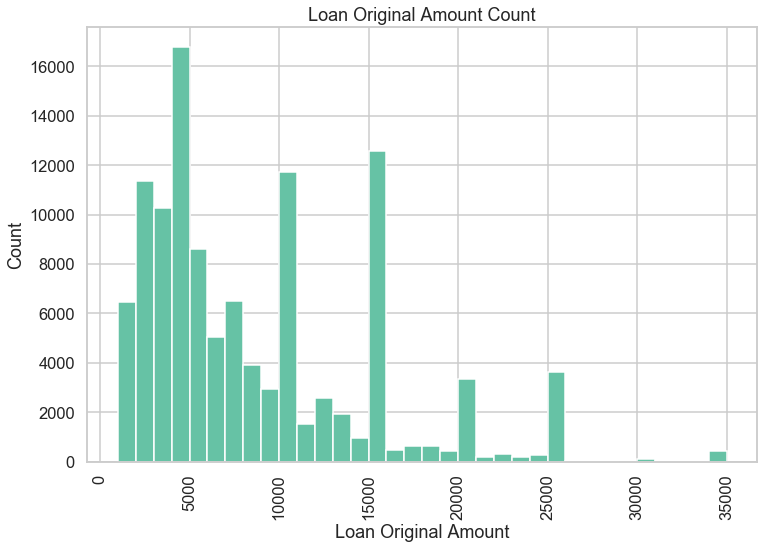

In [5]:
ticks =np.arange(0, 36000 ,5000)
labels = ['{}'.format(v) for v in ticks]

# cut continuous to discrete variable
plt.figure(figsize=(12,8))
bins = np.arange(df_Loan['LoanOriginalAmount'].min(), df_Loan['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df_Loan, x = 'LoanOriginalAmount', bins = bins)
plt.xticks(ticks, labels)
plt.xticks(rotation = 90)
plt.xlabel('Loan Original Amount')
plt.ylabel('Count')
plt.title('Loan Original Amount Count')


After adjusting the bin width and x-axis breaks, we get a nice histogram showing the loans taken ranging from  $$ 1000 to the maximum amount of $ 35,000. The bulk of the count lies below $ 15,000, which indicates that most of the borrowers using Prosper are looking for small(er) loans. The other thing I noticed was that there are huge spikes in the count on nice, round values, like $10,000, $ 15,000, and even $ 20,000 and $ 25,000. This makes sense; people are likelier to fixate on values that are easy to remember, like those that are factors of 5 and 10, rather than arbitrary values in between.

# Occupation


### Next I want to visualize more data on these borrowers, and there are a variety of variables that can paint a clearer picture. Let’s see what they do, and where they’re from:

110349

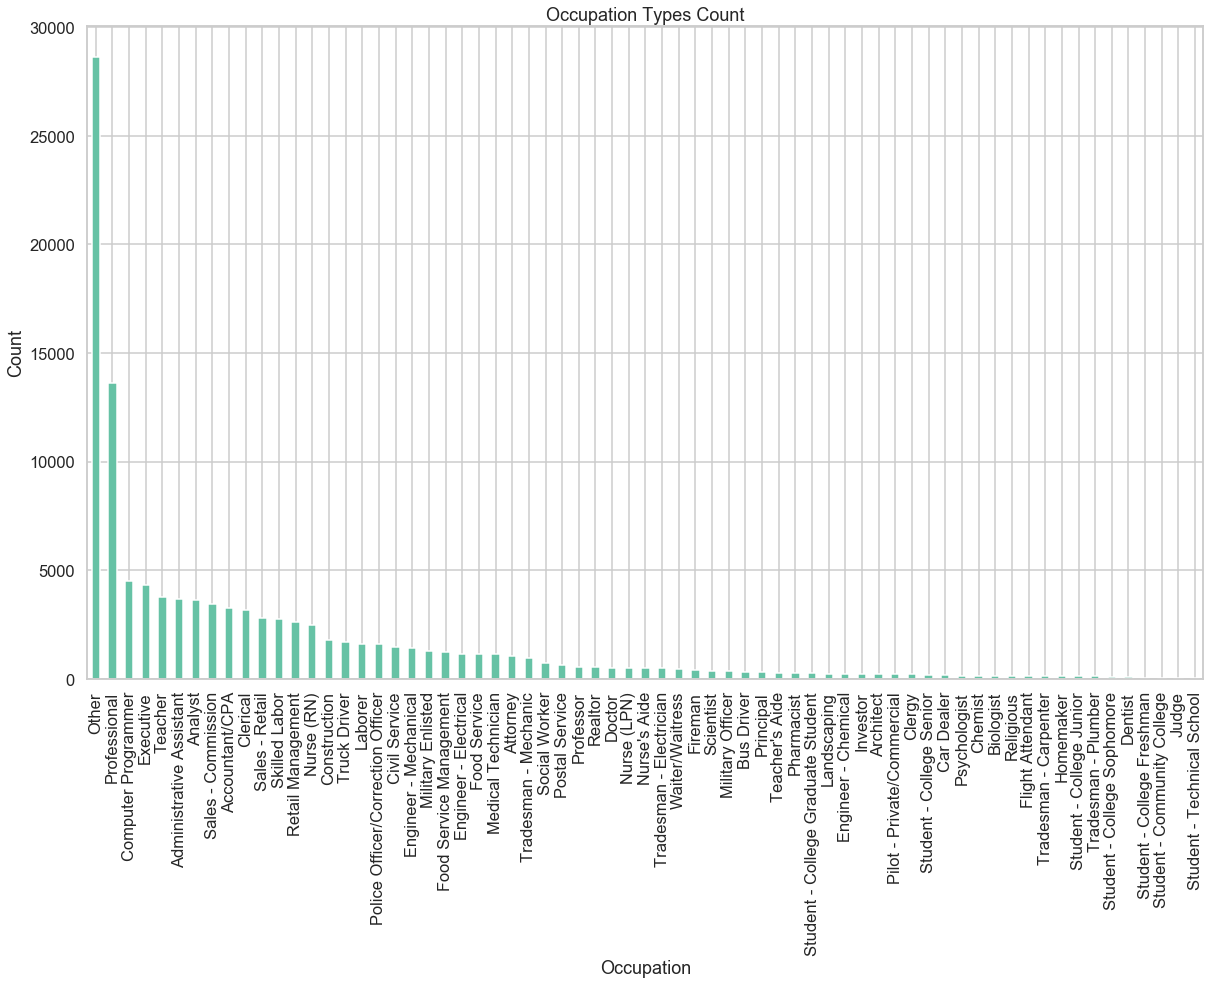

In [6]:
plt.figure(figsize=(20,12))

df_Loan.Occupation.value_counts().plot(kind = 'bar')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Types Count')
df_Loan.Occupation.value_counts().sum()

I first ran the above code without adjusting the text angle, but since there are 68 different occupations listed, the words got all muddled together. So I decided to opt for a vertical approach.

The first thing I noticed in this histogram were the two bars a world away from the rest of the occupations - and a quick check told me that it was the count for ‘Other’ and ‘Professional’. It seems like the people signing up on Prosper are not quite willing to provide their job information, and are opting instead for these two ambiguous options. Most of the professions have pretty low counts, but the diversity is quite interesting. Among all of them, relatively popular ones include analysts, accountants, computer programmers, teachers and executives. Prosper has definitely enabled a wide range of working people to either borrow or invest money.

# States Count Plot

Index(['CA', 'TX', 'NY', 'FL', 'IL', 'GA', 'OH', 'MI', 'VA', 'NJ', 'NC', 'WA',
       'PA', 'MD', 'MO', 'MN', 'MA', 'CO', 'IN', 'AZ', 'WI', 'OR', 'TN', 'AL',
       'CT', 'SC', 'NV', 'KS', 'KY', 'OK', 'LA', 'UT', 'AR', 'MS', 'NE', 'ID',
       'NH', 'NM', 'RI', 'HI', 'WV', 'DC', 'MT', 'DE', 'VT', 'AK', 'SD', 'IA',
       'WY', 'ME', 'ND'],
      dtype='object')


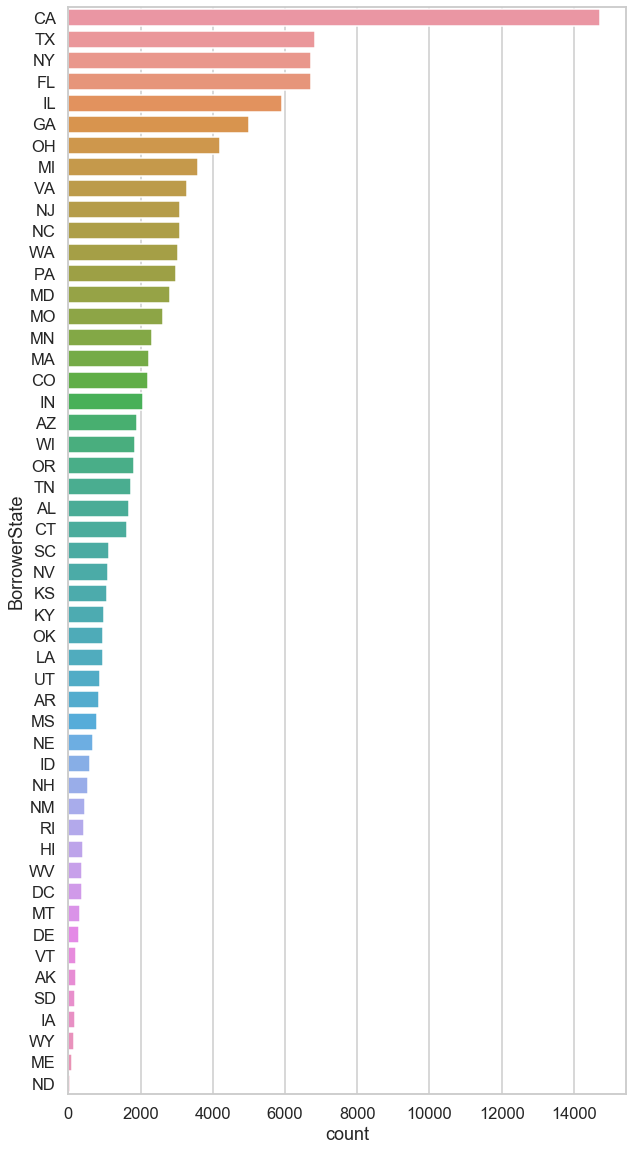

In [7]:
list_Borrower_State=df_Loan['BorrowerState'].value_counts()
order_Borrower_State=list_Borrower_State.index
print(order_Borrower_State)
plt.figure(figsize=(10,20))

sns.countplot(y="BorrowerState", data=df_Loan,order=order_Borrower_State)

California is by far the biggest, and that was expected because it is (i) the state where Prosper was founded and (ii) the state with one of the highest state debt per capita according to this neat interactive data visualization (and also this one). The other popular states include Florida, New York, Texas and Illinois.

# Income ranges of number of people

Text(0.5, 1.0, 'Income Range Count')

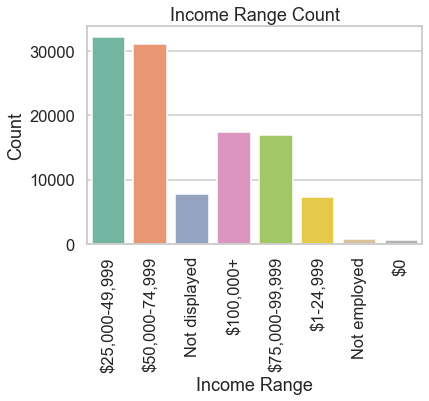

In [8]:
sns.countplot(data = df_Loan, x = 'IncomeRange')
plt.xticks(rotation = 90)
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Income Range Count')

That’s a fantastic looking graph, almost perfectly normally distributed! Unfortunately, it’s not completely right. The x-axis has an arbitrary order when it should have a logical ascending order. Just needs a small adjustment…



# Income Ranges in Sequence

In [9]:
print(df_Loan["IncomeRange"].unique())
# re ordering by size
type_order_income = ["Not employed","$0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+","Not displayed"]


['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' 'Not employed' '$0']


Text(0.5, 1.0, 'Income Range Count')

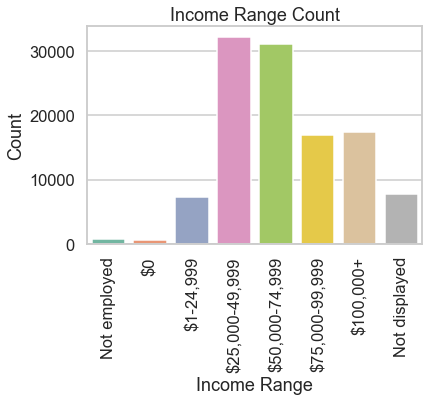

In [10]:
sns.countplot(data = df_Loan, x = 'IncomeRange', order  = type_order_income)
plt.xticks(rotation = 90)
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Income Range Count')

and although this doesn’t look quite as good, it’s much more coherent. The bulk of the data lies in that lower to middle-income region, whom I presume require services such as Prosper’s the most.

# Credit Score Count Plot and Frequency Plot

Text(0.5, 1.0, 'Credit Score Range Lower Frequency')

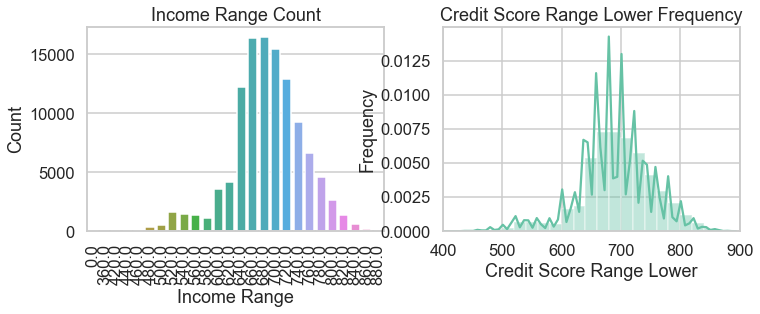

In [11]:
fig = plt.figure(figsize=(11.69, 8.27))
ticks=np.arange(400,901,100)
ax1 = fig.add_subplot(221)
sns.countplot(data = df_Loan, x = 'CreditScoreRangeLower')
plt.xticks(rotation = 90)
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Income Range Count')

ax2 = fig.add_subplot(222)
bins = np.arange(400, 900, 20)
# df_Loan['CreditScoreRangeLower'].plot(kind = 'hist', bins = bins)

sns.distplot(df_Loan['CreditScoreRangeLower'].dropna().values, 
             bins=bins)
plt.xlim((400, 900))
plt.xlabel('Credit Score Range Lower')
plt.ylabel('Frequency')

plt.title('Credit Score Range Lower Frequency')

Text(0.5, 1.0, 'Credit Score Range Lower Frequency')

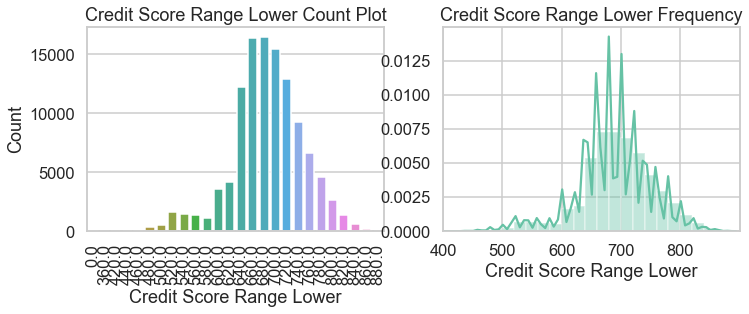

In [12]:
fig = plt.figure(figsize=(11.69, 8.27))

ax1 = fig.add_subplot(221)
sns.countplot(data = df_Loan, x = 'CreditScoreRangeLower')
plt.xticks(rotation = 90)
#plt.xticks(np.arange(10, 900, 100))

plt.xlabel('Credit Score Range Lower')
plt.ylabel('Count')
plt.title('Credit Score Range Lower Count Plot')

ax2 = fig.add_subplot(222)
bins = np.arange(400, 900, 20)
# df_Loan['CreditScoreRangeLower'].plot(kind = 'hist', bins = bins)

sns.distplot(df_Loan['CreditScoreRangeLower'].dropna().values, 
             bins=bins)
plt.xticks(np.arange(400, 900, 100))
plt.xlim((400, 900))
plt.xlabel('Credit Score Range Lower')
plt.title('Credit Score Range Lower Frequency')

The first time I ran the basic code, I got an outlier credit score around the 0 mark. Checking the summary, the results indicated that the minimum was a 9.5, with the 1st quarter at 669.5 and the median at 689.5. I then added limits in the code to get rid of the outlier, and after playing around with the bin width this was the most comprehensible histogram. The plot clearly shows that a majority of the users lie between the 650 and 750 mark, which are decent credit scores and consistent with the previous plots, especially the loan amounts received.

The plot also looked approximately normally distrubuted, so I decided to put a kernel density estimate overlay, just to see how that would look. What I got was the graph on the right, with the yellow dashed line displaying the mean Credit Score. The side on the right of the mean looks a lot more smoother than the side on the left, and I presume that may be because of the rule implemented by Prosper in 2009 - that the minimum Credit Score required for a loan would be 640.

In [13]:
order_CreditGrade=['AA','A','B','C','D','E','HR']

# Credit Grade Count Plot and ProsperRating (Alpha) Count

Text(0.5, 1.0, 'ProsperRating (Alpha) Count')

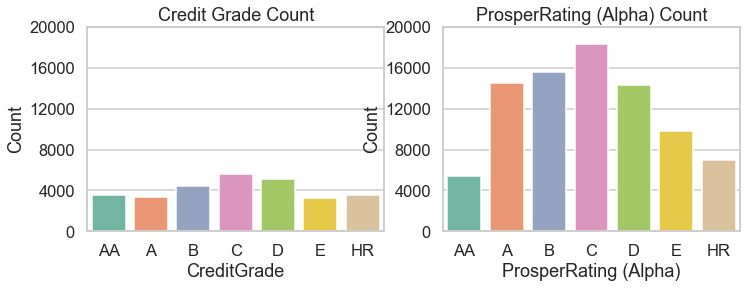

In [14]:
fig = plt.figure(figsize=(11.69, 8.27))
ticks =np.arange(0, 20001, 4000)

ax1 = fig.add_subplot(221)
sns.countplot(data = df_Loan, x = 'CreditGrade',order=order_CreditGrade)
plt.yticks(ticks)

plt.xlabel('CreditGrade')
plt.ylabel('Count')
plt.title('Credit Grade Count')

ax2 = fig.add_subplot(222)
sns.countplot(data = df_Loan, x = 'ProsperRating (Alpha)',order=order_CreditGrade)
plt.yticks(ticks)

plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('Count')
plt.title('ProsperRating (Alpha) Count')

The first important fact that goes along with this plot is that ‘CreditGrade’ is the pre-2009 rating, and ‘ProsperRating’ is the more sophisticated post-2009 rating. Also, ‘CreditGrade’ has around 29,000 values and ‘ProsperRating’ has a little more than 85,000 values, which is displayed by the drastic difference in heights. One thing I immediately noticed is that the relative amounts of ‘AA’ rated loans are much less post-2009 than they were pre-2009. Could it be because of the stricter rating system Prosper implemented? Or maybe the number decreased because of the financial crisis at the time? I’ll explore this a bit more in the bivariate and multivariate plots section.

# Borrower APR

Text(0.5, 1.0, 'Borrower APR Count')

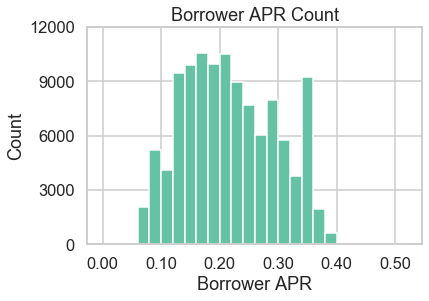

In [15]:
ticks =np.arange(0, 0.6, 0.1)
labels = ['{:.2f}'.format(v) for v in ticks]
bins = np.arange(0, df_Loan['BorrowerAPR'].max()+.02, .02)
# plt.hist(data = df_Loan, x = 'BorrowerAPR', bins = bins)
plt.hist(df_Loan['BorrowerAPR'].dropna().values, bins = bins)

plt.xticks(ticks, labels)
plt.yticks(np.arange(0, 12001, 3000))
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title("Borrower APR Count")


The bulk of the loans seem to be near the 0.2 mark, which coincides with the credit rating histograms that show that the majority of the users are in the middle of the risk ratings. There is a strange spike in the 0.35-0.37 bin which indicates a strangely popular fee rate for primarily higher risk borrowers.

# Lender Yield

Text(0.5, 1.0, 'LenderYield Count')

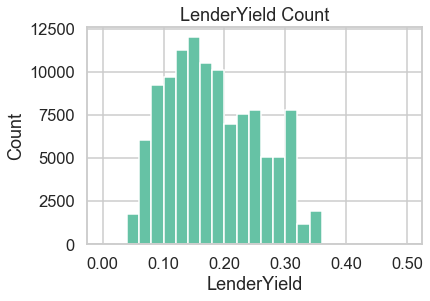

In [16]:
ticks =np.arange(0, 0.6, 0.1)
labels = ['{:.2f}'.format(v) for v in ticks]
bins = np.arange(0, df_Loan['LenderYield'].max()+.02, .02)
plt.hist(df_Loan['LenderYield'].dropna().values, bins = bins)
plt.xticks(ticks, labels)
# plt.xticks(rotation = 90)
plt.xlabel('LenderYield')
plt.ylabel('Count')
plt.title("LenderYield Count")

The lender yield plot is similar to borrower APR because they’re two sides of the same coin. I do notice, however, that the peak count is slightly lower than the one in the borrower APR plot, and I presume it is because of the losses that are made when borrowers default loans or get charged off on late payments.

# Debt To Income Ratio

Text(0.5, 1.0, 'DebtToIncomeRatio Count')

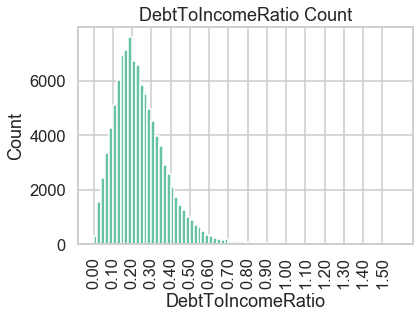

In [17]:

ticks =np.arange(0, 1.6, 0.1)
labels = ['{:.2f}'.format(v) for v in ticks]
bins = np.arange(0, 1.6, .02)
plt.hist(df_Loan['DebtToIncomeRatio'].dropna().values, bins = bins)
plt.xticks(ticks, labels)
plt.xticks(rotation = 90)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Count')
plt.title("DebtToIncomeRatio Count")

Most of the borrowers have a debt-to-income ratio below 0.8, and the tail gets microscopic past that number. I’ve actually limited the x-axis so the plot is clear; the summary will reveal the outliers extremely far away from the rest of the data:

In [18]:
df_Loan["DebtToIncomeRatio"].describe()


count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

# Current Delinquencies

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

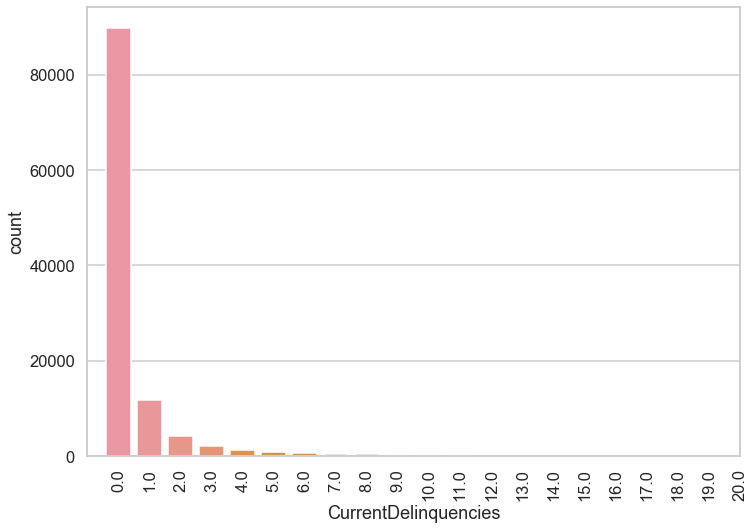

In [19]:
plt.figure(figsize=[ 11.69, 8.27])

sns.countplot(data = df_Loan, x = 'CurrentDelinquencies')
#ticks =list(np.arange(-1, 20, 1))
plt.xlim(-1, 20)

plt.xticks(rotation = 90)


Almost all the borrowers have 0 current delinquencies. I’ve limited the x-axis to 20 so that we can see the abrupt decline in current delinquencies, but a summary will reveal the extremes of the data.

In [20]:
df_Loan["CurrentDelinquencies"].describe()


count    113240.000000
mean          0.592052
std           1.978707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: CurrentDelinquencies, dtype: float64

# Loan Status

In [21]:
print(df_Loan["LoanStatus"].unique())
order_LoanStatus=['Cancelled', 'Chargedoff','Completed','Current','Defaulted','FinalPaymentInProgress','Past Due (>120 days)', 'Past Due (1-15 days)' , 
 'Past Due (16-30 days)','Past Due (31-60 days)' ,  'Past Due (61-90 days)',
 'Past Due (91-120 days)' 
 ]


['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

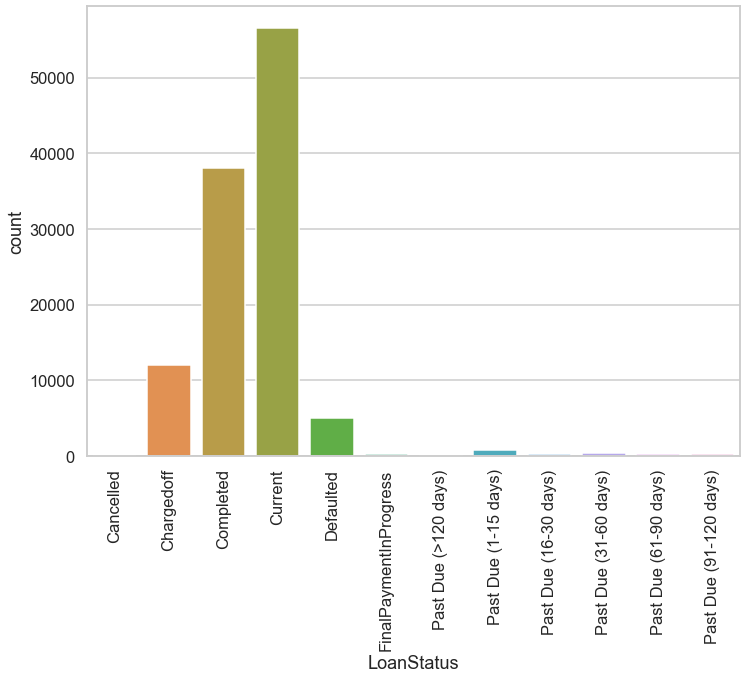

In [22]:

# df_Loan['LoanStatus'].value_counts().plot(kind = 'bar')
# plt.xlabel('Loan Status')
# plt.ylabel('Count')
# plt.title('Loan Status Count')
plt.figure(figsize=[ 11.69, 8.27])

sns.countplot(data = df_Loan, x = 'LoanStatus',order=order_LoanStatus)
plt.xticks(rotation = 90)


Most loans seem to still be ongoing, which is indicative of their booming growth. Later on, I will group some of these factors so that they’re easier to distinguish between.



# ListingCategory (numeric)

In [23]:

df_category=df_Loan
df_category.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Reno", 3: "Business", 4: "Personal",
                                                                5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                                10: "Cosmetic", 11: "Engagement", 12: "Green", 13: "Household",
                                                                14: "LargePurchase", 15: "Medical", 16: "Motorcycle", 17: "RV",
                                                                18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)

df_category.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)

df_category["ListingCategory"][:10]

0       Unknown
1          Reno
2       Unknown
3    Motorcycle
4          Reno
5          Debt
6          Debt
7          Reno
8         Other
9         Other
Name: ListingCategory, dtype: object

# ListingCategory

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

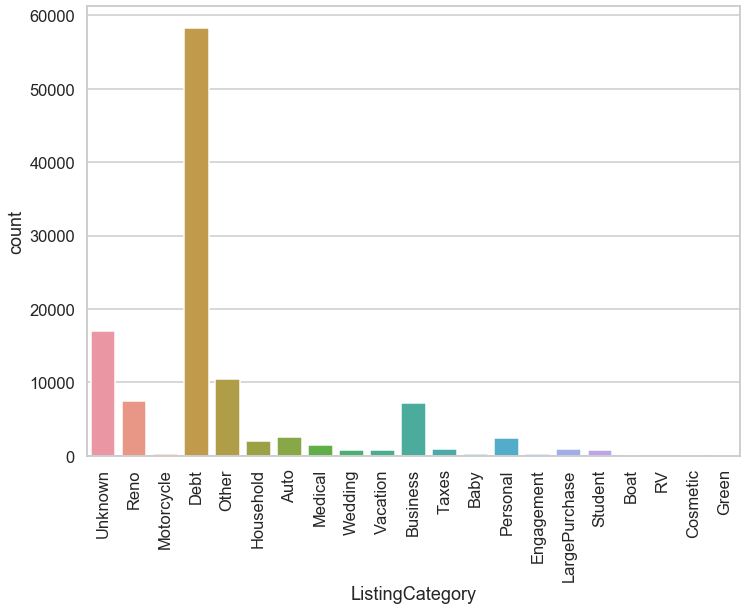

In [24]:
plt.figure(figsize=[ 11.69, 8.27])

sns.countplot(data = df_Loan, x = 'ListingCategory')
plt.xticks(rotation = 90)

Debt Consolidation seems by and far the most popular choice, with the rest of the non-ambiguous (or ’Not Applicable) occupations much below the 10,000 mark.



# Time Series Plots

Time Series plots are incredibly useful in seeing the performance of Prosper since it launched, and pick up on any interesting trends or particular disappointing declines. Since providing loans is Prosper’s business, the first thing to check would be how many loans they’ve coordinated over time (i.e. from 4th quarter 2005 to 1st quarter 2014).

Before I start plotting, however, I’m going to make a new dataset that organizes the information I need. Using the ‘tidyr’ package, I’m going to rename some variables and structure some values to be more conceivable.

# LoanOriginationQuarter

In [25]:
list=df_Loan['LoanOriginationQuarter'].unique()

In [26]:
list

array(['Q3 2007', 'Q1 2014', 'Q1 2007', 'Q4 2012', 'Q3 2013', 'Q4 2013',
       'Q2 2013', 'Q2 2012', 'Q4 2007', 'Q3 2006', 'Q1 2013', 'Q2 2010',
       'Q1 2012', 'Q3 2012', 'Q4 2010', 'Q4 2011', 'Q3 2008', 'Q2 2007',
       'Q4 2006', 'Q2 2011', 'Q1 2011', 'Q1 2008', 'Q3 2009', 'Q3 2011',
       'Q2 2008', 'Q1 2010', 'Q4 2009', 'Q2 2006', 'Q3 2010', 'Q1 2006',
       'Q4 2008', 'Q4 2005', 'Q2 2009'], dtype=object)

Now that that’s done, I’m going to plot loan originations by quarter, starting with the last one in 2005 all the way to the first one in 2014.

In [27]:
 order_LoanOriginationQuarter=['Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006','Q1 2007','Q2 2007','Q3 2007','Q4 2007','Q1 2008','Q2 2008','Q3 2008','Q4 2008','Q1 2010','Q2 2009','Q3 2009','Q4 2009','Q1 2011','Q2 2011','Q3 2011','Q4 2011', 'Q1 2012', 'Q2 2012','Q3 2012', 'Q4 2012','Q1 2013','Q1 2014', 'Q2 2013','Q3 2013','Q4 2013','Q1 2014']

 

No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

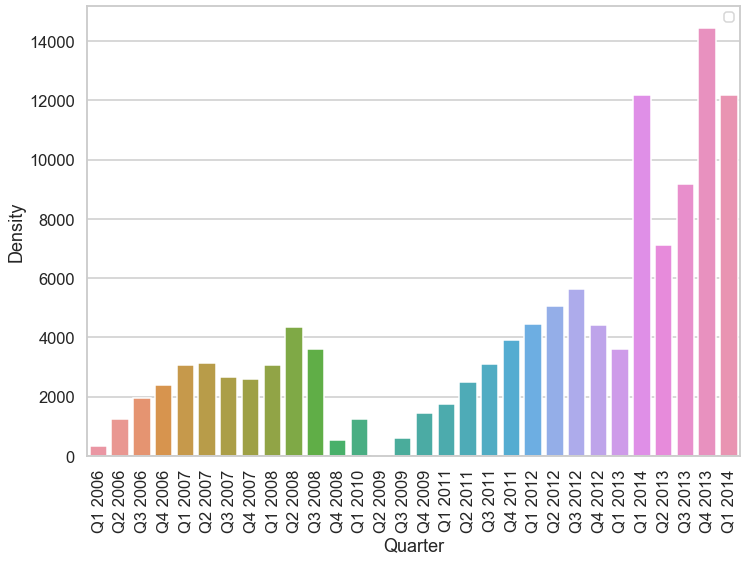

In [28]:
plt.figure(figsize=[ 11.69, 8.27])

sns.countplot(df_Loan['LoanOriginationQuarter'],order=order_LoanOriginationQuarter)
# Plot formatting
plt.xticks(rotation = 90)

plt.legend(prop={'size': 12})
plt.xlabel('Quarter')
plt.ylabel('Density')  

In [29]:
# sns.barplot(x="LoanOriginalAmount", y="LoanOriginationQuarter", data=df_Loan[df_Loan.LoanStatus=='Current'],order=order_LoanOriginationQuarter)

# LoanOriginationQuarter with LoanStatus

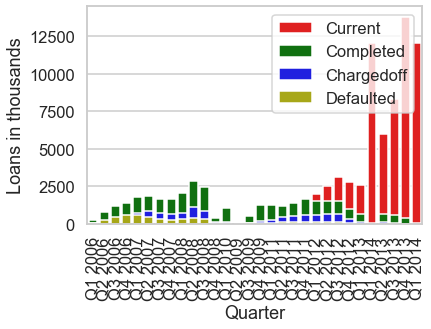

In [30]:
# plt.figure(figsize=(30,20))

sns.countplot(df_Loan.LoanOriginationQuarter[df_Loan.LoanStatus=='Current'], label='Current',order=order_LoanOriginationQuarter, color="r")
sns.countplot(df_Loan.LoanOriginationQuarter[df_Loan.LoanStatus=='Completed'], label='Completed',order=order_LoanOriginationQuarter, color="g")
sns.countplot(df_Loan.LoanOriginationQuarter[df_Loan.LoanStatus=='Chargedoff'], label='Chargedoff',order=order_LoanOriginationQuarter, color="b")
sns.countplot(df_Loan.LoanOriginationQuarter[df_Loan.LoanStatus=='Defaulted'], label='Defaulted',order=order_LoanOriginationQuarter, color="y")
plt.legend(["Current","Completed","Chargedoff","Defaulted"])
plt.xticks(rotation = 90)
plt.ylabel('Loans in thousands');
plt.xlabel('Quarter');

Since it’s a time series plot, it’s appropriate to also display the data in a line. This plot shows the same time series data from the plot above, but with a line instead of a stacked bar chart.

# Bivariate Plots

# ProsperRating (Alpha) vs CreditScoreRangeLower

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

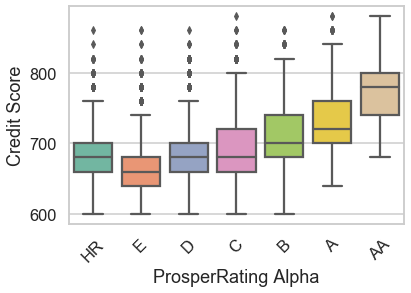

In [31]:
order_CreditGrade_reverse=reversed(order_CreditGrade)
# plt.figure(figsize=(20,12))
sns.boxplot(data = df_Loan, y = 'CreditScoreRangeLower', 
            x = 'ProsperRating (Alpha)',order=order_CreditGrade_reverse)

plt.xlabel('ProsperRating Alpha')
plt.ylabel('Credit Score')
plt.title('')
plt.xticks(rotation = 45)

The boxplots above shows the relationship between borrower’s Prosper rating (note - this is only post-2009 data) and their credit score, and the variation in each rating category. A person’s credit score is one of the key factors in determining their Prosper Rating, so it’s no surprise that as we climb the rating categories, the credit score of the borrowers also tend to increase.

I see that ‘HR’ has a slightly higher median and IQR than ‘E’ despite being a riskier category - in fact, it’s on par with borrowers with a ‘D’ rating. Let’s take a quick look at their summaries to check the details:



Credit Score is one of the factors of Prosper’s rating categories, and these categories, along with some other financial information, determine the Annual Percentage Rate that a will apply to the borrower’s loan. So let’s see how the APR changes as the categories get less risky:

# ProsperRating (Alpha) vs BorrowerAPR

Text(0.5, 1.0, '')

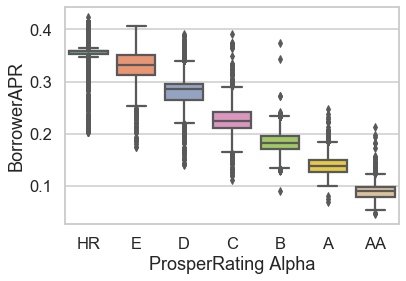

In [32]:
# plt.figure(figsize=(20,12))
order_CreditGrade_reverse=reversed(order_CreditGrade)

sns.boxplot(data = df_Loan, y = 'BorrowerAPR', x = 'ProsperRating (Alpha)',order=order_CreditGrade_reverse)

plt.xlabel('ProsperRating Alpha')
plt.ylabel('BorrowerAPR')
plt.title('')
# plt.xticks(rotation = 45)

The boxplots above show the relationship between borrower’s Prosper rating and their assigned Annual Percentage Rate (APR). It’s very clear that as we go down the ladder of risk - from a ‘High Risk’ to an ‘AA’ rating - the APR for the borrower reduces drastically. In fact, looking at the results of a by() function, it goes from a median APR of 35.8% for High Risk all the way to a median value of 9% for ‘AA’.

The variation in APRs also decreases as the loans get less riskier as displayed by the decreasing size of the boxes in the boxplots when going from ‘HR’ to ‘AA’. There is also a reduction in the number of outliers, which is visible by the shortening lines of yellow rings.

# order_LoanOriginationQuarter vs DefaultedLoans

In [33]:
order_LoanOriginationQuarter=['Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006','Q1 2007','Q2 2007','Q3 2007','Q4 2007','Q1 2008','Q2 2008','Q3 2008','Q4 2008','Q1 2010','Q2 2009','Q3 2009','Q4 2009','Q1 2011','Q2 2011','Q3 2011','Q4 2011', 'Q1 2012', 'Q2 2012','Q3 2012', 'Q4 2012','Q1 2013', 'Q2 2013','Q3 2013','Q4 2013','Q1 2014']


In [34]:
df_status_defaulted=df_Loan[(df_Loan.LoanStatus == 'Defaulted')]
list_1=[]
for item in order_LoanOriginationQuarter:
    
    a=df_Loan[(df_Loan.LoanStatus == 'Defaulted')&(df_Loan.LoanOriginationQuarter == item)].size
    list_1.append(a)

df_status_defaulted.size
list_1

[5022,
 22680,
 38394,
 45117,
 46008,
 34425,
 25110,
 22923,
 24705,
 31104,
 25758,
 3483,
 3240,
 81,
 2511,
 3807,
 4536,
 7128,
 8424,
 8019,
 10773,
 7452,
 7209,
 3483,
 1458,
 1377,
 243,
 81,
 0]

In [35]:
# data_tuples = list(zip(order_LoanOriginationQuarter,list_1))
# data_tuples
d = {'LoanOriginationQuarter':order_LoanOriginationQuarter,'DefaultedLoans':list_1}
df_defaulters_quarter = pd.DataFrame(d)
df_defaulters_quarter

LoanOriginationQuarter  DefaultedLoans
0                 Q1 2006            5022
1                 Q2 2006           22680
2                 Q3 2006           38394
3                 Q4 2006           45117
4                 Q1 2007           46008
5                 Q2 2007           34425
6                 Q3 2007           25110
7                 Q4 2007           22923
8                 Q1 2008           24705
9                 Q2 2008           31104
10                Q3 2008           25758
11                Q4 2008            3483
12                Q1 2010            3240
13                Q2 2009              81
14                Q3 2009            2511
15                Q4 2009            3807
16                Q1 2011            4536
17                Q2 2011            7128
18                Q3 2011            8424
19                Q4 2011            8019
20                Q1 2012           10773
21                Q2 2012            7452
22                Q3 2012            7209
23                Q4 2012            3483
24                Q1 2013            1458
25                Q2 2013            1377
26                Q3 2013             243
27                Q4 2013              81
28                Q1 2014               0

In [36]:
# df_defaulters_quarter=df_defaulters_quarter.drop(df_defaulters_quarter.index[28])


In [37]:
# sns.lineplot(x="LoanOriginationQuarter", y="DefaultedLoans", data=df_defaulters_quarter,sort=False)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

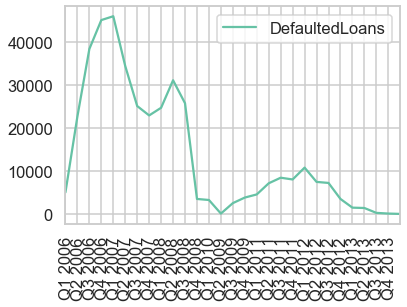

In [38]:
# plt.figure(figsize=(30,20))
ax=df_defaulters_quarter.plot(xticks=np.arange(0,28,1))

#ax.set_xticks(order_LoanOriginationQuarter)

ax.set_xticklabels(df_defaulters_quarter.LoanOriginationQuarter)
#ax.set_xticklabels(df.C)
#df_defaulters_quarter.LoanOriginationQuarter
# xticks(order_LoanOriginationQuarter)
#plt.plot( df_defaulters_quarter)
plt.xticks(rotation = 90)


The line graph above shows the number of loans that were defaulted over time. This is important for Prosper because they can see how frequently bad loans are made, and more importantly, to judge whether any policies - like the minimum credit score - are improving the likelihood of payment.

The 2 times the line veers below the 200 mark are misleading. The first is because of the ‘quiet’ period mentioned before, and therefore expected. The second one, however, in 2013, is because most of the loans in that period are with the ‘Current’ or ‘FinalPaymentInProgress’ status, and there just hasn’t been enough time to know whether loans are ‘Completed’ or ‘Defaulted’. Over time, that line should go higher.

In [39]:
df_status_defaulted

ListingKey  ListingNumber            ListingCreationDate  \
15      0F483544120452347F48121         577164  2012-04-10 09:14:46.297000000   
23      101B35764008108187B2EBA         758964  2013-04-22 13:29:19.073000000   
107     10BE354254173728633D033         573446  2012-03-29 12:17:10.017000000   
128     110A3373894473317F98123          57371  2006-11-05 12:48:42.960000000   
138     11273541569159931E84F17         569000  2012-03-16 09:22:33.393000000   
179     0F1E35343868130956BD68F         544844  2011-12-16 03:50:25.970000000   
184     2D59337364929273288AFC4          62504  2006-11-16 00:31:16.370000000   
185     2D593491034220560C1708E         469092  2010-07-29 16:13:12.967000000   
191     2D77337290872125308271B          53938  2006-10-27 08:42:58.807000000   
193     0F6133644711535583E92C3          17091  2006-05-31 23:48:17.177000000   
206     2EB933650172111114C843E           3509  2006-03-25 13:09:11.680000000   
213     10263383420237035058C79         103628  2007-02-26 10:25:18.177000000   
215     103A3377507398946CE5005          77149  2006-12-21 23:33:22.780000000   
217     104B3374855982110B5D1D5          70044  2006-12-04 08:18:38.707000000   
220     2F0833852153039902F9092         117265  2007-03-30 12:12:04.140000000   
222     2F2234069312657701D0A5C         246034  2007-12-06 20:01:37.313000000   
251     1017337109780442576A19C          53828  2006-10-26 21:24:37.090000000   
320     30D43428763365789DF354A         385755  2008-08-20 14:16:52.930000000   
336     00AF3373975597240A81AE3          65219  2006-11-22 06:07:39.093000000   
370     31473380022487753FFBD5E          86811  2007-01-19 17:36:39.063000000   
379     08F63499047448294C7B049         484485  2010-11-15 15:54:39.747000000   
391     410F354681069774329D89F         591628  2012-05-22 06:11:55.710000000   
399     00FD339416476049946DFDB         163311  2007-07-05 07:41:05.603000000   
404     01263376488945456B20D17          74300  2006-12-13 16:18:03.820000000   
419     2C71357856570789463BB05         781432  2013-05-16 19:43:43.153000000   
490     320D342139964586467F64C         329040  2008-05-08 18:37:44.037000000   
494     450C33645901374670E9F31          30032  2006-08-08 19:04:32.300000000   
535     3BEF3377123627974A5EF50          77938  2006-12-26 01:04:33.120000000   
558     00C53510427046493B0F72C         497004  2011-03-08 09:58:33.817000000   
568     32663410056892799ADBCDC         268847  2008-01-21 08:17:45.730000000   
...                         ...            ...                            ...   
113328  F2D933930402127231118AF         162775  2007-07-03 20:22:43.837000000   
113347  D6863409470409297B740EB         261533  2008-01-07 23:19:51.300000000   
113381  D6AB3367267147916E18B57          36166  2006-09-02 05:16:52.837000000   
113393  DF633418353227774234865         303629  2008-04-02 19:56:39.307000000   
113400  F3533431687840426E5EC85         398067  2008-09-14 09:16:21.097000000   
113410  F38433650357620374A39A6           9391  2006-04-28 06:21:53.780000000   
113412  F3903495914699495AF443B         477078  2010-09-27 03:26:37.450000000   
113454  DA023366781039135DC36D6          32752  2006-08-20 15:04:06.070000000   
113501  F65A3411184813599D0E4E5         264630  2008-01-13 17:03:58.563000000   
113508  F6793430004356250613A30         385561  2008-08-20 08:44:19.070000000   
113517  F6B434235328414801924AE         348244  2008-06-10 16:37:31.540000000   
113523  DA6934249256893007815B3         354053  2008-06-20 08:15:59.340000000   
113531  D8B533733916498089D684E          58677  2006-11-08 00:38:30.120000000   
113580  DFAE3552480401583B2F046         614787  2012-07-21 18:46:08.857000000   
113614  CABD3413208203621FB889E         283823  2008-02-24 20:38:30.613000000   
113625  C2873542706172342D5415B         569035            2012-03-15 16:29:21   
113635  E001337581687920321EE55          71424  2006-12-06 18:54:15.510000000   
113693  E2193428655642974D34A0B         376241  2008

# LoanOriginationQuarter vs defaulted loans

In [40]:
df_loan_defaulted=df_Loan[df_Loan.LoanStatus=='Defaulted']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

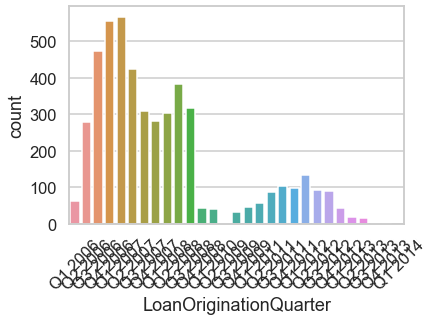

In [41]:
# plt.figure(figsize=(20,12))

sns.countplot(df_Loan.LoanOriginationQuarter[df_Loan.LoanStatus=='Defaulted'],order=order_LoanOriginationQuarter)
plt.xticks(rotation = 45)

The graph above shows the number of loans that were defaulted over time. This is important for Prosper because they can see how frequently bad loans are made, and more importantly, to judge whether any policies - like the minimum credit score - are improving the likelihood of payment.

The 2 times the line veers below the 200 mark are misleading. The first is because of the ‘quiet’ period mentioned before, and therefore expected. The second one, however, in 2013, is because most of the loans in that period are with the ‘Current’ or ‘FinalPaymentInProgress’ status, and there just hasn’t been enough time to know whether loans are ‘Completed’ or ‘Defaulted’. Over time, that line should go higher.

# LoanOriginationDate vs LoanOriginalAmount

In [42]:
# create subset dataframe "loan_origin" for time series plot

loan_origin = df_Loan.loc[:, ('LoanOriginationDate','LoanOriginalAmount')]

In [43]:
# conver to date time
loan_origin['LoanOriginationDate'] = pd.to_datetime(loan_origin['LoanOriginationDate'])

In [44]:
# make date time index column
loan_origin.set_index('LoanOriginationDate', inplace=True)

In [45]:
# to avoid over plotting, will resample form original,
# look at monthly data
monthly = loan_origin.resample('M').sum()

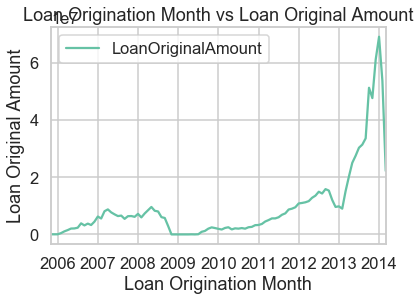

In [46]:
#ticks =np.arange(0, 80000 ,1000)

monthly.plot()
#plt.yticks(ticks);
plt.xlabel('Loan Origination Month')
plt.ylabel('Loan Original Amount')
plt.title('Loan Origination Month vs Loan Original Amount');

From all along the journey of prosper loan the above graph shows that the Amount of Money given to the people increass and large amount loane were provided Aftet the mid of 2014 to the end of yhe year. Loan amount increased over time except in 2009. Decreased in 2009 is may be for financial crisis.



# Multivariate Plots

# DelinquenciesLast7Years vs  AmountDelinquent vs EmploymentStatus

In [47]:
# sns.distplot(df_Loan.LoanOriginationQuarter[df_Loan.LoanStatus=='Defaulted'])
df_status_Employment=df_Loan[(df_Loan.EmploymentStatus == 'Employed')|(df_Loan.EmploymentStatus == 'Retired')|(df_Loan.EmploymentStatus == 'Self-employed')|(df_Loan.EmploymentStatus == 'Part-time')|(df_Loan.EmploymentStatus == 'Not available')|(df_Loan.EmploymentStatus == 'Full-time')]
df_Loan.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

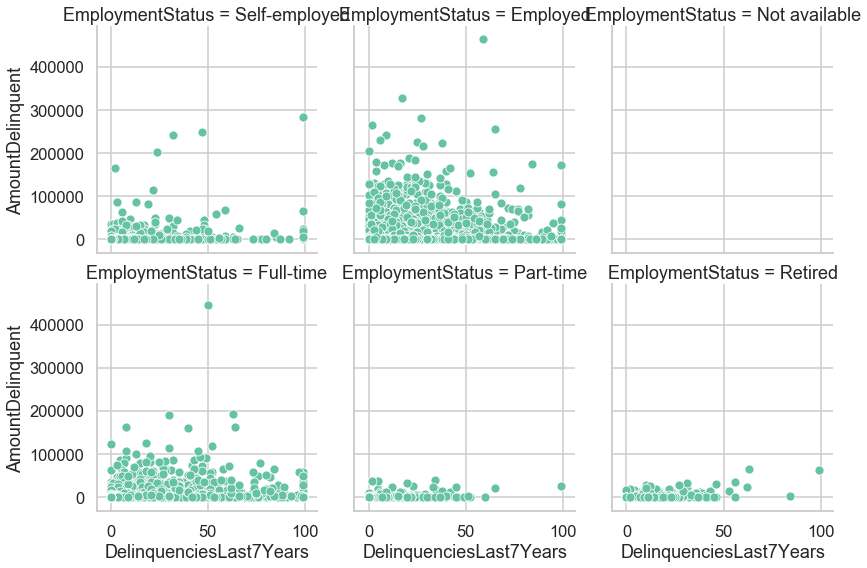

In [48]:
g = sns.FacetGrid(df_status_Employment, col="EmploymentStatus",col_wrap=3,height=4, aspect=1)
g.map(sns.scatterplot, "DelinquenciesLast7Years", "AmountDelinquent");
#plt.title()

This plot doesn’t reveal much. I wanted to see the relationship between the amount borrowers were delinquent and the number of delinquencies they’ve had over the last 7 years. I then separated that by employment status to see if people that weren’t full employed had higher delinquencies or owed more money. The overplotting and general dispersion of data doesn’t really reveal the trend I hypothesized.

In [49]:
df_status=df_Loan[(df_Loan.LoanStatus == 'Completed')|(df_Loan.LoanStatus == 'Defaulted')]
df_status

ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
11      0F1734025150298088A5F2B         213551  2007-10-09 20:28:33.640000000   
15      0F483544120452347F48121         577164  2012-04-10 09:14:46.297000000   
21      1017340630713945364DA6B         241498  2007-11-30 20:33:49.227000000   
23      101B35764008108187B2EBA         758964  2013-04-22 13:29:19.073000000   
26      0F4F3571508214190FD75CB         713131  2013-02-12 18:07:31.690000000   
27      0F5034867864161084F3789         463083  2010-06-16 16:23:44.533000000   
30      0F57353904771934596FE9F         555213  2012-01-30 17:59:17.200000000   
33      0F6B3496936961316AEE1B2         478891  2010-10-10 13:23:30.757000000   
39      109D3366077649289619396          24135  2006-07-11 17:14:14.647000000   
46      0F8B34281015537050D4FEC         378497  2008-08-05 19:42:49.197000000   
59      100634009060155161268D8         203384  2007-09-18 13:19:02.487000000   
63      0F1A336989050248528ED31          45641  2006-10-07 00:32:48.020000000   
66      0F1D338731363098438C9F5         122819  2007-04-12 17:00:57.690000000   
67      0F2535122339224397B0FB9         499401  2011-03-25 17:20:01.857000000   
68      0F2F338417457873000F9A3         111744  2007-03-15 21:00:17.840000000   
72      0DDD3513251820967144478         503744  2011-04-24 12:00:31.987000000   
76      0DFD336490760860963B515          24177  2006-07-11 20:48:47.660000000   
77      0DFD35069860903300C7973         494156  2011-02-17 05:52:07.960000000   
87      107D3547498442173689AFA         594208  2012-05-30 08:40:11.343000000   
88      10803531522293214B198DF         538785  2011-11-13 20:05:58.260000000   
90      0FC333723307531761A7001          56671  2006-11-03 09:21:43.977000000   
91      0FD13502904293521146412         487757  2010-12-13 09:44:54.653000000   
92      0FE433661215082408720F0          22591  2006-07-02 11:05:02.857000000   
102     0F823461624751165710F76         421994  2009-08-25 13:37:08.130000000   
107     10BE354254173728633D033         573446  2012-03-29 12:17:10.017000000   
108     10C034203841683992703F1         321000  2008-04-29 08:26:00.340000000   
109     10C23461228816873E20817         422813  2009-09-02 03:17:56.993000000   
110     10C53499552694250BE1012         485323  2010-11-21 16:34:22.307000000   
...                         ...            ...                            ...   
113866  C9563467992330262C23724         433774  2009-11-16 19:11:53.663000000   
113868  D1BA3493924562804523377         473147  2010-08-25 18:57:24.790000000   
113869  D1BC35453654346955F1438         580325  2012-04-18 17:10:48.980000000   
113872  D1C634013964207595BB979         208897  2007-09-30 12:00:41.010000000   
113873  D1D2351120893738726E74C         500411  2011-03-31 10:50:00.283000000   
113878  E2B53426332861197A39828         369559  2008-07-18 09:57:36.917000000   
113879  E2B8342284935785971B58B         348840  2008-06-11 14:34:19.010000000   
113880  E2BB339232119273831CB46         156978  2007-06-23 12:44:16.720000000   
113882  E2CD34776314984817D9869         448077  2010-02-26 13:02:11.150000000   
113890  E30A339559930932949408F         182018  2007-08-05 13:14:14.447000000   
113891  E30E3385157595321467881         119186  2007-04-04 18:33:17.170000000   
113894  E32734699821101105178D8         438537  2009-12-15 18:50:46.193000000   
113897  E6A53426405611446E7A12A         367938  2008-07-15 15:54:49.397000000   
113898  E6AD3479076761979835475         451665  2010-03-25 14:30:17.687000000   
113899  E6BB34788205132176FCDD9         449436  2010-03-08 20:48:58.387000000   
113902  E6D13366465509973F5E90A           3579  2006-03-26 00:11:04.620000000   
113906  C982341623647969155E514         300858  2008-03-28 11:38:58.730000000   
113908  C9843500054876019D611A1         486057  2010

# Employment Status and Borrower Rate vs Status


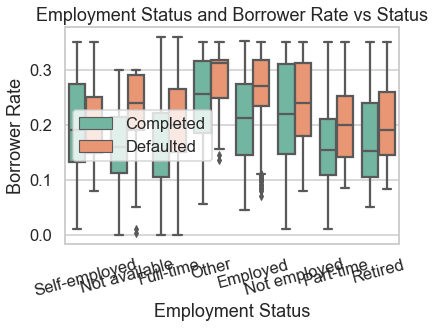

In [50]:
sns.boxplot(data = df_status, y = 'BorrowerRate', 
            x = 'EmploymentStatus', hue = "LoanStatus");

plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate')
plt.title('Employment Status and Borrower Rate vs Status');
plt.xticks(rotation = 15);
plt.legend(loc="top right")

Borrower rate is higher for defaulter in each group.



# DebtToIncomeRatio vs CreditScoreRangeUpper vs LoanStatus

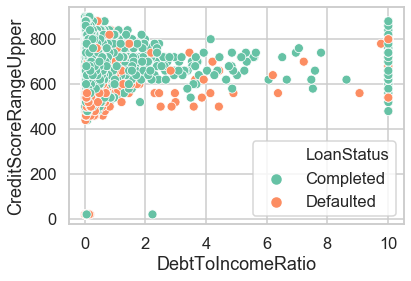

In [51]:
# plt.figure(figsize=(20,12))

sns.scatterplot(x="DebtToIncomeRatio", y="CreditScoreRangeUpper",hue="LoanStatus", data=df_status)


In this scatter plot, I notice that there is a lot of overplotting at the low end of the debt to income ratio, and a disctint line of points at a ratio of 10, with a sparse no-man’s land in between. The plot isn’t very informational. I notice that the defaulters tend to have lower credit scores - around 600 and below - displayed by the sea of red. Past 600 it seems mostly green, but once again it’s awfully overplotted and since I don’t see any other trends, I won’t take this any further.



# DebtToIncomeRatio vs BorrowerAPR vs ProsperRating (Alpha)

(array([0. , 0.5, 1. , 1.5, 2. ]), <a list of 5 Text xticklabel objects>)

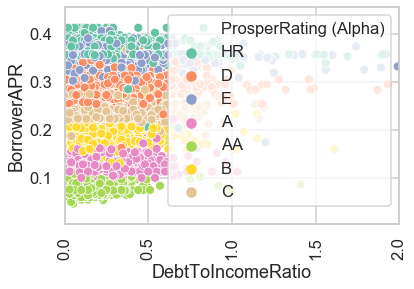

In [52]:
# plt.figure(figsize=(20,12))

sns.scatterplot(x="DebtToIncomeRatio", y="BorrowerAPR",hue="ProsperRating (Alpha)", data=df_status)
plt.xlim(0, 2)

plt.xticks(rotation = 90)


This is a great plot with a lot of information. Here we have a scatter plot of borrower’s APR and the debt to income ratio of the borrower, with the colors describing the risk category given to the particular loan. I’ve given the legend a continuous color scale despite it being discrete variables because it displays the progression from a safe green to a risky red. I’ve also decided to include all points in the y-axis (including outliers) to show the range of rates, and I’ve limited the x-axis by removing 0.05% of the points furthest away from the median (i.e. removing outliers that spread the graph).

The first thing I notive and find interesting is that ‘A’ category loans seem to have a lower APRs and a smaller range of debt-to-income ratios, both of which indicate less risk. The rest of the plot follow the color palette and APR increases as the rating gets riskier. Another thing is that most people tend to have debt-to-income ratios below 1, regardless of risk category. Also, there is this unusual horizontal line in the ‘HR’ category that extends past 1 and all the way to 1.5, while lower ratings tend to be sparse in the 1.0+ debt-to-income ratio range.

# LoanOriginalAmount vs LenderYield vs ProsperRating (Alpha) vs LoanStatus

In [53]:
# loan_status_group=
df_Loan['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [54]:
df_Loan_status_Group=df_Loan
df_Loan_status_Group['LoanStatus'] = df_Loan['LoanStatus'].replace(['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (61-90 days)','Past Due (31-60 days)','Past Due (91-120 days)','Past Due (>120 days)'],'Past Due')


In [55]:
df_Loan_status_Group['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

In [56]:
df_Loan_status_Group_4=df_Loan_status_Group[(df_Loan.LoanStatus == 'Completed')|(df_Loan.LoanStatus == 'Defaulted')|(df_Loan.LoanStatus == 'Current')|(df_Loan.LoanStatus == 'Past Due')]


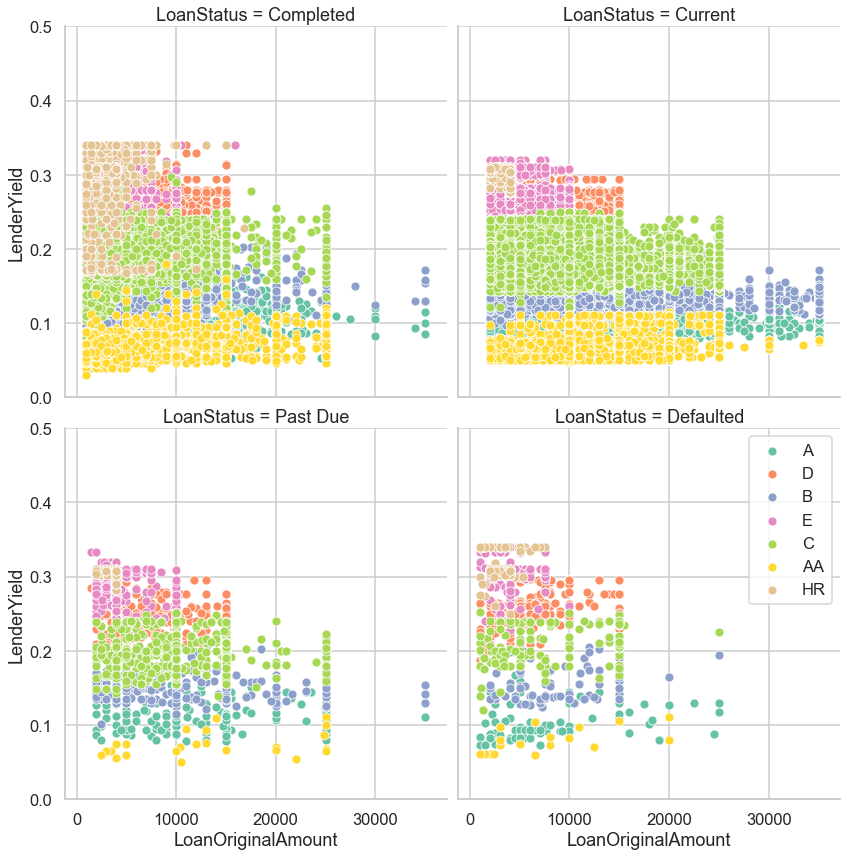

In [57]:

g = sns.FacetGrid(df_Loan_status_Group_4, hue="ProsperRating (Alpha)",col="LoanStatus",col_wrap=2, height=6, aspect=1)
g.map(sns.scatterplot, "LoanOriginalAmount", "LenderYield");
plt.ylim(0, 0.5)
plt.legend(["AA","A","B","C","D","E","HR"])
plt.legend(loc="upper right")


This plot shows the relationship between a lender yield on the loan and the amount that a borrower has loaned. I then made individual graphs to show that relationsip based on the status of the loan - Defaulted, Past Due, Current and Completed - and finally coloured it based on risk rating.

# CurrentDelinquencies vs BorrowerAPR vs LoanStatus vs ProsperRating (Alpha)

# CurrentDelinquencies vs BorrowerAPR vs LoanStatus(defaulted) vs ProsperRating (Alpha)

In [58]:
df_status_Completed=df_Loan[(df_Loan['LoanStatus'] == 'Completed')]


In [59]:
df_status_Defaulted=df_Loan[(df_Loan['LoanStatus'] == 'Defaulted')]


In [60]:
#Order_ProsperRating_Alpha=["",]

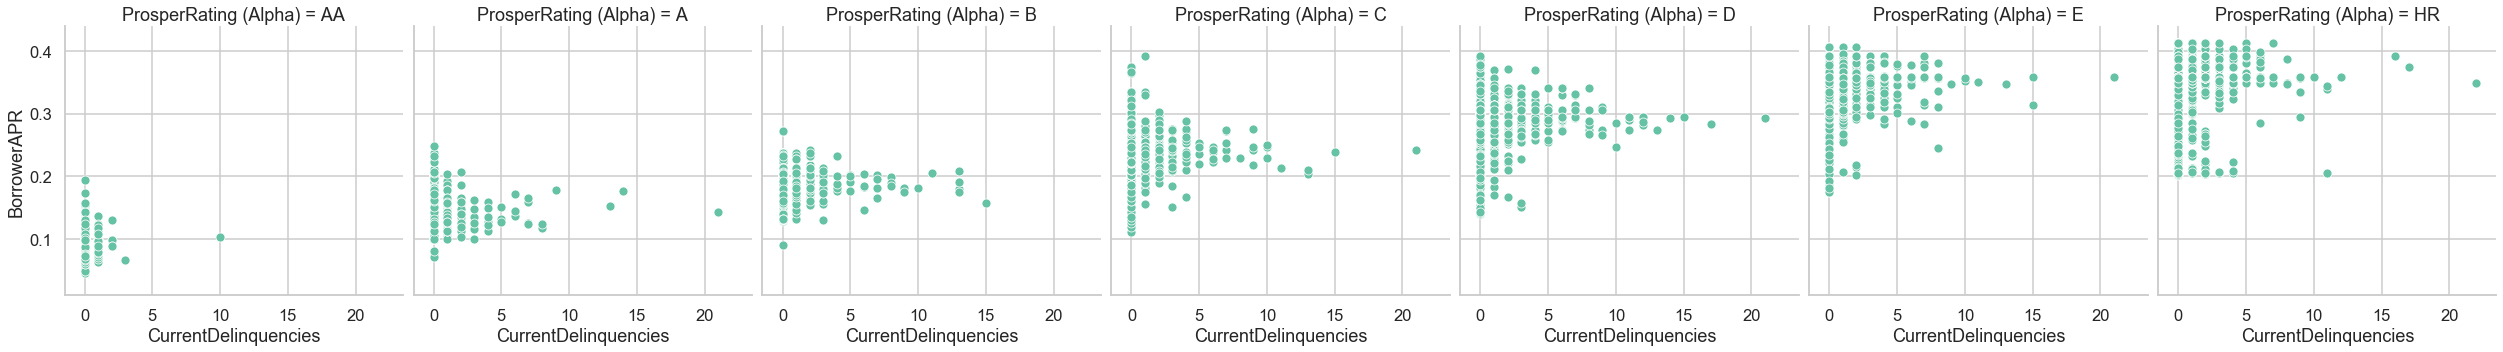

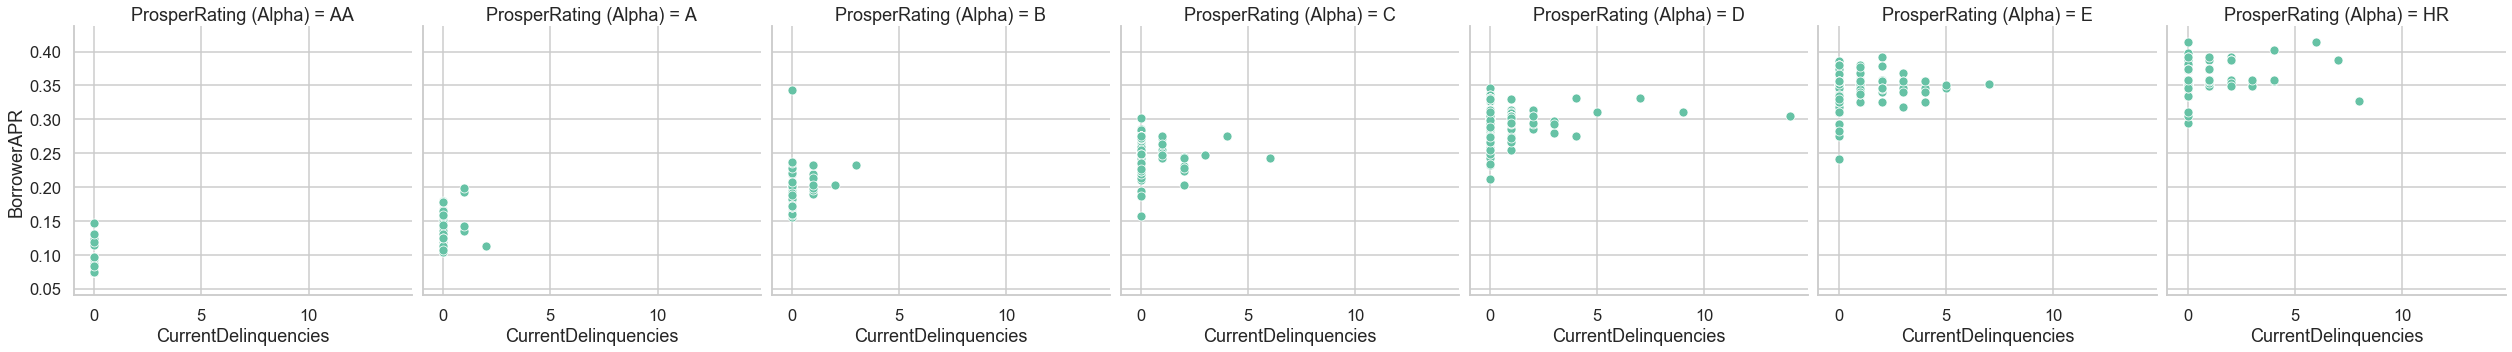

In [61]:
g = sns.FacetGrid(df_status_Completed, hue="LoanStatus",col="ProsperRating (Alpha)",col_wrap=7, height=5, aspect=1, col_order=order_CreditGrade)
g.map(sns.scatterplot, "CurrentDelinquencies", "BorrowerAPR");
g = sns.FacetGrid(df_status_Defaulted, hue="LoanStatus",col="ProsperRating (Alpha)",col_wrap=7, height=5, aspect=1, col_order=order_CreditGrade)
g.map(sns.scatterplot, "CurrentDelinquencies", "BorrowerAPR");

This plot was made to see if there were any distinct differences in terms of completing and defaulting loans when it came to current delinquencies. Unfortunately, there doesn’t seem to be any tell-tale signs and both plots look pretty similar. However, I do notice that higher rated loans seem less diverse in terms of delinquencies and APR, and customarily lumped in the bottom left corner. As the loan gets riskier, the points get more varied and diverse, and tend to be all over the graph.

# Final Plots

## Plot One

# LoanOriginationQuarter vs LoanStatus

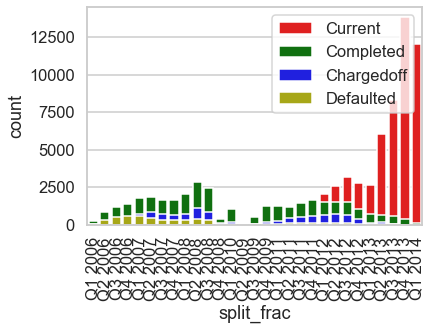

In [62]:
# plt.figure(figsize=(30,20))

sns.countplot(df_Loan.LoanOriginationQuarter[df_Loan.LoanStatus=='Current'], label='Current',order=order_LoanOriginationQuarter,color="r")
sns.countplot(df_Loan.LoanOriginationQuarter[df_Loan.LoanStatus=='Completed'], label='Completed',order=order_LoanOriginationQuarter,color="g")
sns.countplot(df_Loan.LoanOriginationQuarter[df_Loan.LoanStatus=='Chargedoff'], label='Chargedoff',order=order_LoanOriginationQuarter,color="b")
sns.countplot(df_Loan.LoanOriginationQuarter[df_Loan.LoanStatus=='Defaulted'], label='Defaulted',order=order_LoanOriginationQuarter,color="y")
plt.xticks(rotation = 90)
plt.legend(["Current","Completed","Chargedoff","Defaulted"])

plt.xlabel('split_frac');

I have chosen this plot because of it’s combination of detail and simplicity. It makes for an easy way to evaluate the performance of Prosper laons. I’m going to compare it as pre-2009 and post-2009, because 2009 was when they went into a ‘quiet’ period and changed their business model and also mandated a minimum credit score of 640. This plot is one way of visually seeing whether their changes have resulted in a more prosperous lending platform (sorry!).

First let’s look at pre-2009. They were still a young company at the time, and we can see that with the sub-5000 loans per quarter figure. More importantly, though, all the loans originated at the time are either completed or defaulted (i.e. none are still ongoing). Now I can compare the relative sizes of the red and green bars, and I can easily tell that approximately half, or a bit less that half the loans that were granted, defaulted.

That’s not good, especially when they have to convince investors that they’re making solid investments. Now let’s look at post-2009. Right when they restarted servicing loans, for about the next year, we can see that the size of the red bar is much smaller relative to the green bar. That tells me that their minimum credit policy seems like it’s working - defaults look pretty low in number.

I chose to look at only the next year because there seem to be no, or an insignificant amount of loans still currently active. After that - 2011 onwards - we see the number of loans being originated rise tremendously. The red bar to green bar ratio seems to be increasing slowly, but it’s difficult to tell with the growing ‘Current’ blue bar in between. But a few questions arise - how many of those current loans will end up in the green, completed group in the future? How many will instead dive into the yellow of ‘Past Due’? And out of those, how many will make it out and enter green, and how many will fall into the dreadful red of ‘Defaulted’?

It’s difficult to say whether their new policies have improved investment quality - the first year certainly suggests so, but scaling up quickly invariably leads to some new problems. Only time can tell what color the blues in the plot will convert to.

## Plot Two

# LoanOriginalAmount vs LenderYield vs ProsperRating (Alpha) vs LoanStatus

In [63]:
# loan_status_group=
df_Loan['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

In [64]:
df_Loan_status_Group=df_Loan
df_Loan_status_Group['LoanStatus'] = df_Loan['LoanStatus'].replace(['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (61-90 days)','Past Due (31-60 days)','Past Due (91-120 days)','Past Due (>120 days)'],'Past Due')


In [65]:
df_Loan_status_Group['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

In [66]:
df_Loan_status_Group_4=df_Loan_status_Group[(df_Loan.LoanStatus == 'Completed')|(df_Loan.LoanStatus == 'Defaulted')|(df_Loan.LoanStatus == 'Current')|(df_Loan.LoanStatus == 'Past Due')]


(0, 0.5)

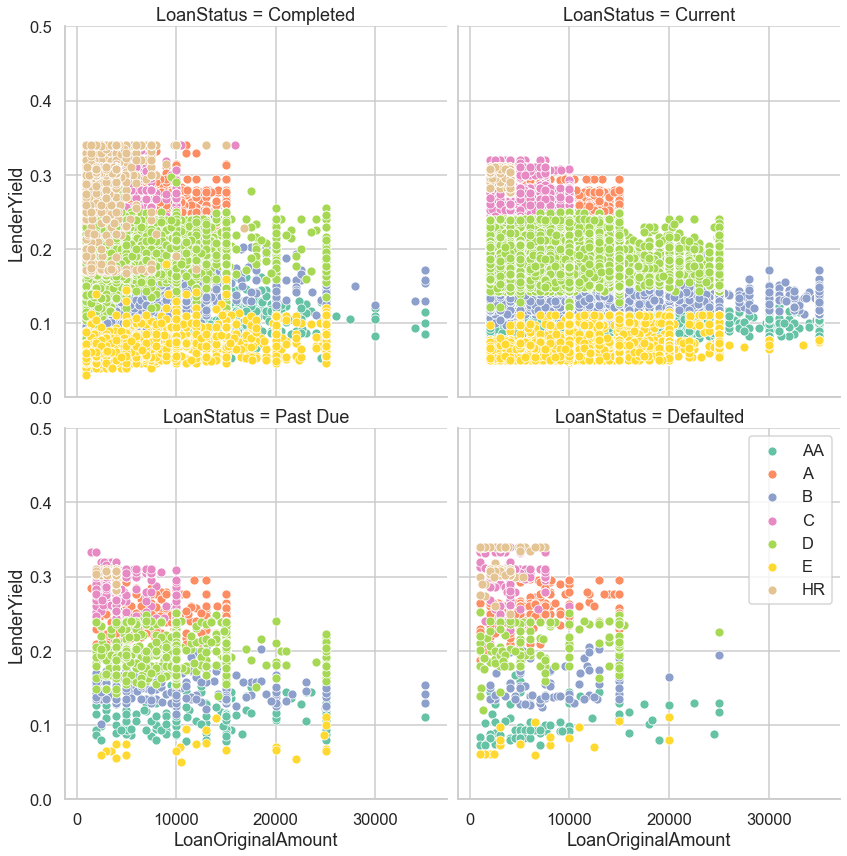

In [67]:

g = sns.FacetGrid(df_Loan_status_Group_4, hue="ProsperRating (Alpha)",col="LoanStatus",col_wrap=2, height=6, aspect=1)
g.map(sns.scatterplot, "LoanOriginalAmount", "LenderYield");
plt.legend(["AA","A","B","C","D","E","HR"])

plt.ylim(0, 0.5)


I have chosen this plot because of the vast range of questions it can answer. I can immediately see that the defaulted category doesn’t have any loans more than about $25,000. In fact, even in the Past Due and Completed sections, there aren’t a lot of loans above around the $25,000 mark. In the Current category, however, I see much more loans being taken past the $25,000 mark and even past the $30,000 mark and veering towards the maximum of $35k.

With the colouring, I see that the Defaulted and Completed categories look quite haphazard. In fact for defaulted loans, the bold red of High Risk is plastered all over the yield range, which is contrasting to the other 3 categories where the yield tends to be around 35-40%.

I personally like the Current category because of the neat, ordered rows of colours. One thing that I had pointed out before, and is very apparent here, is that the ‘A’ rating seems to get lower yields. I also see that borrowers with a riskier rating tend to go for lower loan amounts, which makes sense because they’re afraid of not being able to pay them off should any unfortunate circumstances take place, like losing a job, say. Also, it’s unlikelier for their loan listing will be accepted should they choose a high amount.

This plot always a direct comparison between Defaulted and Completed loans that we can compare. For example, I see that ‘A’ rated loans seem scarce compared to ‘AA’ rated loans in the Defaulted category, wheras in the Completed category they seem more or less even. I also see that there are very little ‘HR’ rated loans in the Current category - could it be because of Prosper’s new minimum credit score? The same amount seems to be in the Past Due section, and from Plot One we can see that there are very few total loans in that category.

I’ve just mentioned a few questions that can be answered through this plot, and I’m sure there are answers to questions I haven’t even thought of. However, I think it’s appropriate to comment on the limitations of the plot - the main one being that the overplotting often hides some of the information. For example, there could a few bold green AAs hiding amoung the yellow Cs - and that means we’re not getting the full, exact picture. Nonetheless, it is a fantastic indicator of trends, and its complexity is useful in answering questions the previous two plots could not.



# Extra Plots

# order_LoanOriginationQuarter vs DefaultedLoans

In [68]:
order_LoanOriginationQuarter=['Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006','Q1 2007','Q2 2007','Q3 2007','Q4 2007','Q1 2008','Q2 2008','Q3 2008','Q4 2008','Q1 2010','Q2 2009','Q3 2009','Q4 2009','Q1 2011','Q2 2011','Q3 2011','Q4 2011', 'Q1 2012', 'Q2 2012','Q3 2012', 'Q4 2012','Q1 2013', 'Q2 2013','Q3 2013','Q4 2013','Q1 2014']


In [69]:
df_status_defaulted=df_Loan[(df_Loan.LoanStatus == 'Defaulted')]
list_1=[]
for item in order_LoanOriginationQuarter:
    
    a=df_Loan[(df_Loan.LoanStatus == 'Defaulted')&(df_Loan.LoanOriginationQuarter == item)].size
    list_1.append(a)

df_status_defaulted.size
list_1

[5022,
 22680,
 38394,
 45117,
 46008,
 34425,
 25110,
 22923,
 24705,
 31104,
 25758,
 3483,
 3240,
 81,
 2511,
 3807,
 4536,
 7128,
 8424,
 8019,
 10773,
 7452,
 7209,
 3483,
 1458,
 1377,
 243,
 81,
 0]

In [70]:
# data_tuples = list(zip(order_LoanOriginationQuarter,list_1))
# data_tuples
d = {'LoanOriginationQuarter':order_LoanOriginationQuarter,'DefaultedLoans':list_1}
df_defaulters_quarter = pd.DataFrame(d)
df_defaulters_quarter

LoanOriginationQuarter  DefaultedLoans
0                 Q1 2006            5022
1                 Q2 2006           22680
2                 Q3 2006           38394
3                 Q4 2006           45117
4                 Q1 2007           46008
5                 Q2 2007           34425
6                 Q3 2007           25110
7                 Q4 2007           22923
8                 Q1 2008           24705
9                 Q2 2008           31104
10                Q3 2008           25758
11                Q4 2008            3483
12                Q1 2010            3240
13                Q2 2009              81
14                Q3 2009            2511
15                Q4 2009            3807
16                Q1 2011            4536
17                Q2 2011            7128
18                Q3 2011            8424
19                Q4 2011            8019
20                Q1 2012           10773
21                Q2 2012            7452
22                Q3 2012            7209
23                Q4 2012            3483
24                Q1 2013            1458
25                Q2 2013            1377
26                Q3 2013             243
27                Q4 2013              81
28                Q1 2014               0

In [71]:
# df_defaulters_quarter=df_defaulters_quarter.drop(df_defaulters_quarter.index[28])


In [72]:
# sns.lineplot(x="LoanOriginationQuarter", y="DefaultedLoans", data=df_defaulters_quarter,sort=False)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

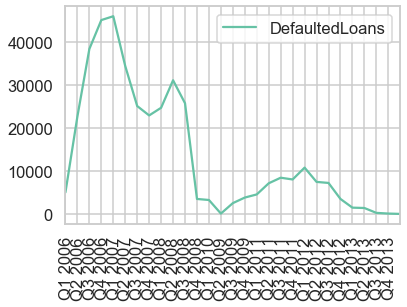

In [73]:
# plt.figure(figsize=(30,20))
ax=df_defaulters_quarter.plot(xticks=np.arange(0,28,1))

#ax.set_xticks(order_LoanOriginationQuarter)

ax.set_xticklabels(df_defaulters_quarter.LoanOriginationQuarter)
#ax.set_xticklabels(df.C)
#df_defaulters_quarter.LoanOriginationQuarter
# xticks(order_LoanOriginationQuarter)
#plt.plot( df_defaulters_quarter)
plt.xticks(rotation = 90)


In [74]:
df_status_defaulted

ListingKey  ListingNumber            ListingCreationDate  \
15      0F483544120452347F48121         577164  2012-04-10 09:14:46.297000000   
23      101B35764008108187B2EBA         758964  2013-04-22 13:29:19.073000000   
107     10BE354254173728633D033         573446  2012-03-29 12:17:10.017000000   
128     110A3373894473317F98123          57371  2006-11-05 12:48:42.960000000   
138     11273541569159931E84F17         569000  2012-03-16 09:22:33.393000000   
179     0F1E35343868130956BD68F         544844  2011-12-16 03:50:25.970000000   
184     2D59337364929273288AFC4          62504  2006-11-16 00:31:16.370000000   
185     2D593491034220560C1708E         469092  2010-07-29 16:13:12.967000000   
191     2D77337290872125308271B          53938  2006-10-27 08:42:58.807000000   
193     0F6133644711535583E92C3          17091  2006-05-31 23:48:17.177000000   
206     2EB933650172111114C843E           3509  2006-03-25 13:09:11.680000000   
213     10263383420237035058C79         103628  2007-02-26 10:25:18.177000000   
215     103A3377507398946CE5005          77149  2006-12-21 23:33:22.780000000   
217     104B3374855982110B5D1D5          70044  2006-12-04 08:18:38.707000000   
220     2F0833852153039902F9092         117265  2007-03-30 12:12:04.140000000   
222     2F2234069312657701D0A5C         246034  2007-12-06 20:01:37.313000000   
251     1017337109780442576A19C          53828  2006-10-26 21:24:37.090000000   
320     30D43428763365789DF354A         385755  2008-08-20 14:16:52.930000000   
336     00AF3373975597240A81AE3          65219  2006-11-22 06:07:39.093000000   
370     31473380022487753FFBD5E          86811  2007-01-19 17:36:39.063000000   
379     08F63499047448294C7B049         484485  2010-11-15 15:54:39.747000000   
391     410F354681069774329D89F         591628  2012-05-22 06:11:55.710000000   
399     00FD339416476049946DFDB         163311  2007-07-05 07:41:05.603000000   
404     01263376488945456B20D17          74300  2006-12-13 16:18:03.820000000   
419     2C71357856570789463BB05         781432  2013-05-16 19:43:43.153000000   
490     320D342139964586467F64C         329040  2008-05-08 18:37:44.037000000   
494     450C33645901374670E9F31          30032  2006-08-08 19:04:32.300000000   
535     3BEF3377123627974A5EF50          77938  2006-12-26 01:04:33.120000000   
558     00C53510427046493B0F72C         497004  2011-03-08 09:58:33.817000000   
568     32663410056892799ADBCDC         268847  2008-01-21 08:17:45.730000000   
...                         ...            ...                            ...   
113328  F2D933930402127231118AF         162775  2007-07-03 20:22:43.837000000   
113347  D6863409470409297B740EB         261533  2008-01-07 23:19:51.300000000   
113381  D6AB3367267147916E18B57          36166  2006-09-02 05:16:52.837000000   
113393  DF633418353227774234865         303629  2008-04-02 19:56:39.307000000   
113400  F3533431687840426E5EC85         398067  2008-09-14 09:16:21.097000000   
113410  F38433650357620374A39A6           9391  2006-04-28 06:21:53.780000000   
113412  F3903495914699495AF443B         477078  2010-09-27 03:26:37.450000000   
113454  DA023366781039135DC36D6          32752  2006-08-20 15:04:06.070000000   
113501  F65A3411184813599D0E4E5         264630  2008-01-13 17:03:58.563000000   
113508  F6793430004356250613A30         385561  2008-08-20 08:44:19.070000000   
113517  F6B434235328414801924AE         348244  2008-06-10 16:37:31.540000000   
113523  DA6934249256893007815B3         354053  2008-06-20 08:15:59.340000000   
113531  D8B533733916498089D684E          58677  2006-11-08 00:38:30.120000000   
113580  DFAE3552480401583B2F046         614787  2012-07-21 18:46:08.857000000   
113614  CABD3413208203621FB889E         283823  2008-02-24 20:38:30.613000000   
113625  C2873542706172342D5415B         569035            2012-03-15 16:29:21   
113635  E001337581687920321EE55          71424  2006-12-06 18:54:15.510000000   
113693  E2193428655642974D34A0B         376241  2008

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

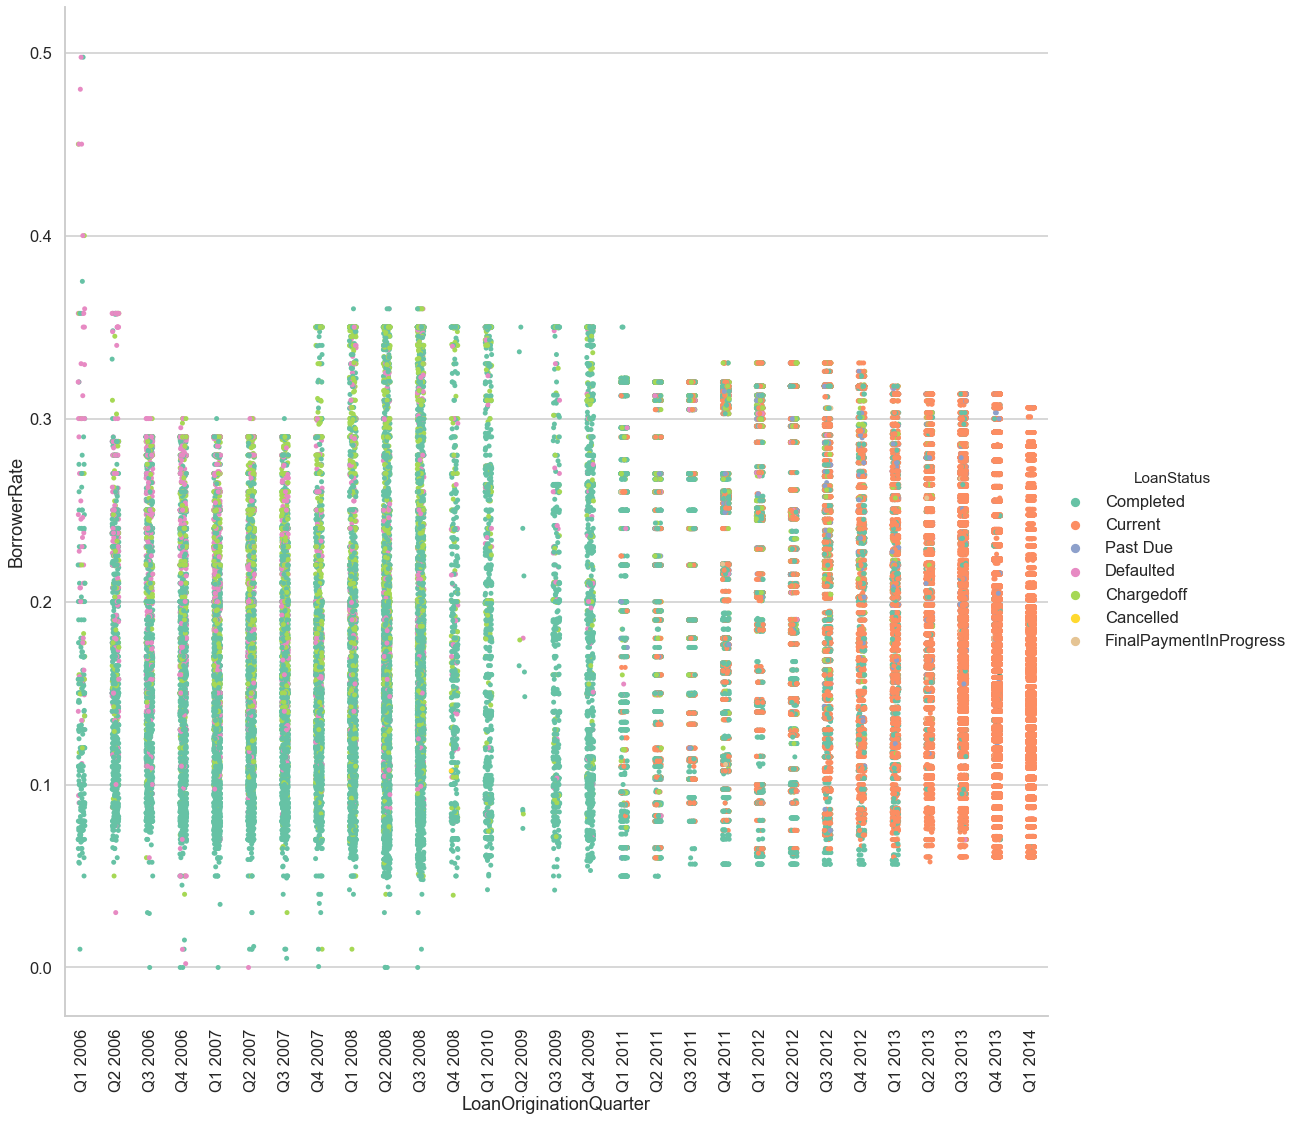

In [75]:
# ax = sns.lineplot(x="LoanOriginationQuarter", y="DefaultedLoans", data=df_defaulters_quarter)
# plt.plot("LoanOriginationQuarter", "DefaultedLoans", data=df_defaulters_quarter)
# plt.figure(figsize=(30,20))
# fig.set_size_inches(11.7, 8.27)
sns.set_context({"figure.figsize": (11.69, 8.27)})
# # plt.show()

sns.catplot(x="LoanOriginationQuarter", y="BorrowerRate",hue="LoanStatus", height=15, data=df_Loan,order=order_LoanOriginationQuarter);
plt.xticks(rotation = 90)


In [76]:
#sns.catplot(x="LoanOriginationQuarter", y="LoanStatus", kind="point", data=df_status_defaulted);


In [77]:
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# x = df_Loan["LoanOriginationQuarter"]

In [78]:
#df_Loan["LoanOriginationQuarter"].value_counts().plot()


In [79]:
#fig, ax = plt.subplots()
#df_Loan['LoanOriginationQuarter'].value_counts().plot(ax=ax, kind='line')

In [80]:
# field = "LoanOriginationQuarter"
# # day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# ax = df_Loan["LoanOriginationQuarter"].set_index("LoanOriginationQuarter").loc[df_defaulters_quarter].plot(kind="bar", legend=False)
# ax.set_ylabel("Value")


In [81]:
# s = df_Loan['LoanOriginationQuarter'].value_counts()
# s.reindex(np.intersect1d(order_LoanOriginationQuarter, s.index)).plot.line()
# plt.xticks(order_LoanOriginationQuarter)

In [82]:
# fig, ax = plt.subplots()
# #df_Loan["LoanOriginationQuarter"].plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
# df_Loan["LoanOriginationQuarter"].plot.hist(density=True, ax=ax)
# ax.set_ylabel('Probability')
# ax.grid(axis='y')
# ax.set_facecolor('#d8dcd6')

In [83]:
# sns.set(font_scale=1.4)
# df_Loan.set_index('LoanOriginationQuarter')['LoanOriginationQuarter'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
# plt.xlabel("Date", labelpad=15)
# plt.ylabel("Daily Step Count", labelpad=15)
# plt.title("My Daily Step Count Tracked by Fitbit", y=1.02, fontsize=22);

# 27/09/2019

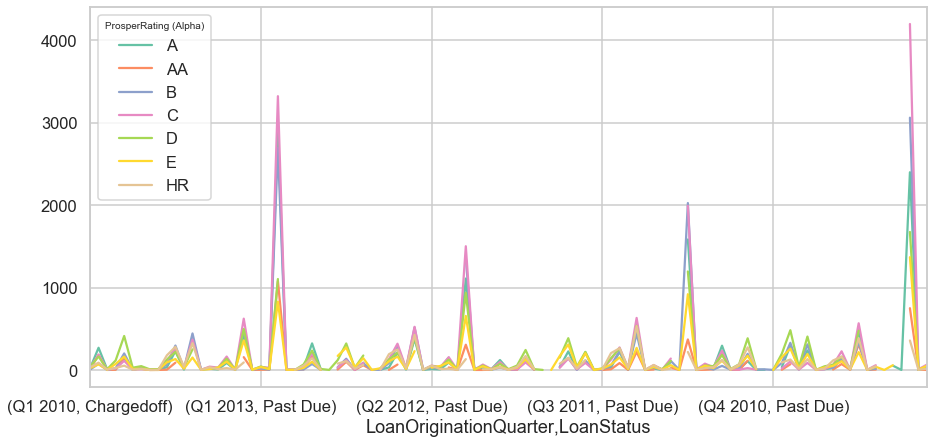

In [84]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_Loan.groupby(["LoanOriginationQuarter","LoanStatus","ProsperRating (Alpha)"])['LoanOriginationQuarter'].count().unstack().plot(ax=ax)

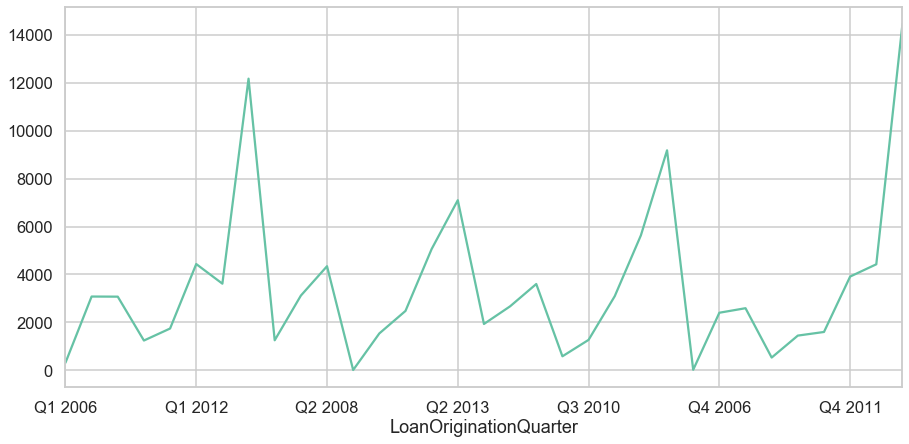

In [85]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_Loan.groupby(["LoanOriginationQuarter"])['LoanStatus'].count().plot(ax=ax)
# ax.set_xticklabels(df_defaulters_quarter["LoanOriginationQuarter"])
#ax=plt.xlabel(df_defaulters_quarter["LoanOriginationQuarter"])


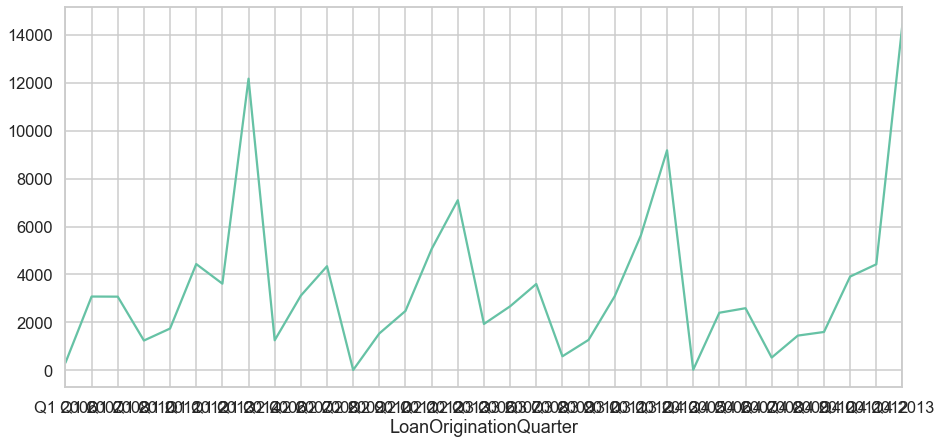

In [86]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df=df_Loan.groupby(["LoanOriginationQuarter"])
df['LoanOriginationQuarter'].count().plot(ax=ax,xticks=np.arange(0,33,1))
xticks=df_defaulters_quarter.LoanOriginationQuarter
#np.arange(0,28,1)
#ax.set_xticklabels(df_defaulters_quarter.LoanOriginationQuarter)

#sns.countplot(df.LoanOriginationQuarter[df_Loan.LoanStatus=='Defaulted'],order=order_LoanOriginationQuarter)


In [87]:
df['LoanOriginationQuarter'].unique().count()

33

In [88]:
# sorterIndex = dict(zip(sorter,range(len(sorter))))
df = df_Loan
df['LoanOriginationQuarter2']=df['LoanOriginationQuarter']
df = df_Loan.set_index('LoanOriginationQuarter')
df=df.loc[order_LoanOriginationQuarter]
df

ListingKey  ListingNumber  \
LoanOriginationQuarter                                           
Q1 2006                 2EB933650172111114C843E           3509   
Q1 2006                 09A833656549997602264C7           1105   
Q1 2006                 00BA3364778959938EDA750            137   
Q1 2006                 43D03365506791463BE5D2A           1908   
Q1 2006                 025233659799100495FDCA5            594   
Q1 2006                 368E33651446582305DE1B6            150   
Q1 2006                 65E03365906900318D38961            794   
Q1 2006                 2B943364844863465115360            759   
Q1 2006                 507C3364377459026C16B70           2524   
Q1 2006                 053733656017340432FF8E2           1301   
Q1 2006                 8B0B3366311860742E5B108           1594   
Q1 2006                 42083366023268939EBC25E           1405   
Q1 2006                 867C3365709366560185CFE            979   
Q1 2006                 05BA3364400192060E6A53D            197   
Q1 2006                 47A83366169318576DF4433           2473   
Q1 2006                 0E6433644213077973F4953           2208   
Q1 2006                 0EBE336518246562415C602           1410   
Q1 2006                 99A03364602612597F57699           1769   
Q1 2006                 99F83365215020782CED629            245   
Q1 2006                 4D113366240556559E71143           2526   
Q1 2006                 3D233365244584278B037B2            995   
Q1 2006                 00F13365855109722535DD6            515   
Q1 2006                 561C3365324812163286633           2339   
Q1 2006                 020C33664079242054A16A2            292   
Q1 2006                 0BEC33653408877891D642F           1423   
Q1 2006                 A6CE3364478437076B9D033           1714   
Q1 2006                 9A5B33657249119794C3EA6           3063   
Q1 2006                 9F6F3365447593194218BE5           3988   
Q1 2006                 152633664629462672AA888            194   
Q1 2006                 A29D3366189574345A1BD49            405   
...                                         ...            ...   
Q1 2014                 CCBE359836656035503F118        1102520   
Q1 2014                 CCE635965785545025E9AFD        1102137   
Q1 2014                 FDA336005950425667CFBCE        1130362   
Q1 2014                 E1FB360202575235882CC37        1169548   
Q1 2014                 DC013601950920632A66188        1176956   
Q1 2014                 E2513597928165340541004        1110164   
Q1 2014                 C49F3600200301310CA2AF6        1106560   
Q1 2014                 DC213603097144035821571        1190813   
Q1 2014                 DC323603756758014CC716B        1217261   
Q1 2014                 DE6836015542769595C8879        1202625   
Q1 2014                 C6DF36000953088984E59E0        1171287   
Q1 2014                 CF7D360314586070746CBB7        1187275   
Q1 2014                 CF833598215700502CA6121        1091218   
Q1 2014                 E43E35990212382128FB3B0        1127958   
Q1 2014                 E457360161315253186457B        1180527   
Q1 2014                 C6E63602586259657E29507        1212689   
Q1 2014                 C6F0360163239376458D6BC        1131469   
Q1 2014                 CF993599802831274C08218        1096402   
Q1 2014                 CF9D35995956313059A9841        1115217   
Q1 2014                 CFAA36019536746196211FA        1184645   
Q1 2014                 DEE936037855871980A9C72        1230414   
Q1 2014                 DF45360176809914475660A        1211163   
Q1 2014                 E3003604647943060EAC1F2        1214654   
Q1 2014                 E3113599386032713DCFDE2        1150203   
Q1 2014                 E31A36014701412354CD6A2        1170177   
Q1 2014                 E6BC360425933005095E619        1214162   
Q1 2014                 E6D5360239825759235A854        1182559   
Q1 2014                 C9873600264828351437CAB        1161059   
Q1 2014    

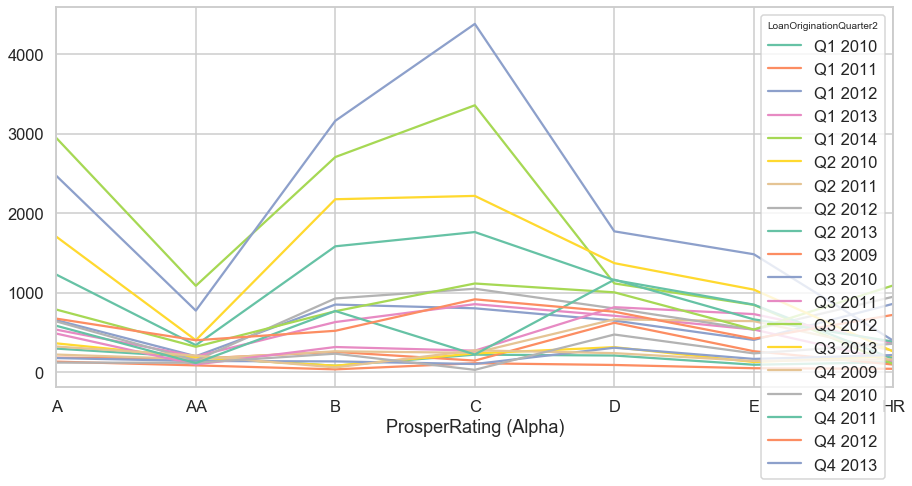

In [89]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_Loan.groupby(["ProsperRating (Alpha)","LoanOriginationQuarter2"])['ProsperRating (Alpha)'].count().unstack().plot(ax=ax)

In [90]:
df_Loan["LoanOriginationQuarter"].unique()


array(['Q3 2007', 'Q1 2014', 'Q1 2007', 'Q4 2012', 'Q3 2013', 'Q4 2013',
       'Q2 2013', 'Q2 2012', 'Q4 2007', 'Q3 2006', 'Q1 2013', 'Q2 2010',
       'Q1 2012', 'Q3 2012', 'Q4 2010', 'Q4 2011', 'Q3 2008', 'Q2 2007',
       'Q4 2006', 'Q2 2011', 'Q1 2011', 'Q1 2008', 'Q3 2009', 'Q3 2011',
       'Q2 2008', 'Q1 2010', 'Q4 2009', 'Q2 2006', 'Q3 2010', 'Q1 2006',
       'Q4 2008', 'Q4 2005', 'Q2 2009'], dtype=object)

In [91]:
# df = df_Loan
# df['LoanOriginationQuarter2']=df['LoanOriginationQuarter']
# #df = df_Loan.set_index('LoanOriginationQuarter')
# "df.loc[order_LoanOriginationQuarter]

In [92]:
df.replace(to_replace={"LoanOriginationQuarter2": {'Q1 2006':'2006 Q1', 'Q2 2006': '2006 Q2', 'Q3 2006':'2006 Q3', 'Q4 2006':'2006 Q4','Q1 2007':'2007 Q1','Q2 2007':'2007 Q2','Q3 2007':'2007 Q3','Q4 2007':'2007 Q4','Q1 2008':'2008 Q1','Q2 2008':'2008 Q2','Q3 2008':'2008 Q3','Q4 2008':'2008 Q4','Q2 2009':'2009 Q2','Q3 2009':'2009 Q3','Q4 2009':'2009 Q4','Q1 2010':'2010 Q1','Q2 2010':'2010 Q2','Q3 2010':'2010 Q3','Q4 2010':'2010 Q4','Q1 2011':'2011 Q1','Q2 2011':'2011 Q2','Q3 2011':'2011 Q3','Q4 2011':'2011 Q4', 'Q1 2012': '2012 Q1', 'Q2 2012': '2012 Q2','Q3 2012':'2012 Q3', 'Q4 2012': '2012 Q4','Q1 2013':'2013 Q1', 'Q2 2013': '2013 Q2','Q3 2013':'2013 Q3','Q4 2013':'2013 Q4','Q1 2014':'2014 Q1'}}, inplace=True)


In [93]:
df["LoanOriginationQuarter2"].unique()


array(['2006 Q1', '2006 Q2', '2006 Q3', '2006 Q4', '2007 Q1', '2007 Q2',
       '2007 Q3', '2007 Q4', '2008 Q1', '2008 Q2', '2008 Q3', '2008 Q4',
       '2010 Q1', '2009 Q2', '2009 Q3', '2009 Q4', '2011 Q1', '2011 Q2',
       '2011 Q3', '2011 Q4', '2012 Q1', '2012 Q2', '2012 Q3', '2012 Q4',
       '2013 Q1', '2013 Q2', '2013 Q3', '2013 Q4', '2014 Q1'],
      dtype=object)

# MULTIVARIANT

(array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5]), <a list of 36 Text xticklabel objects>)

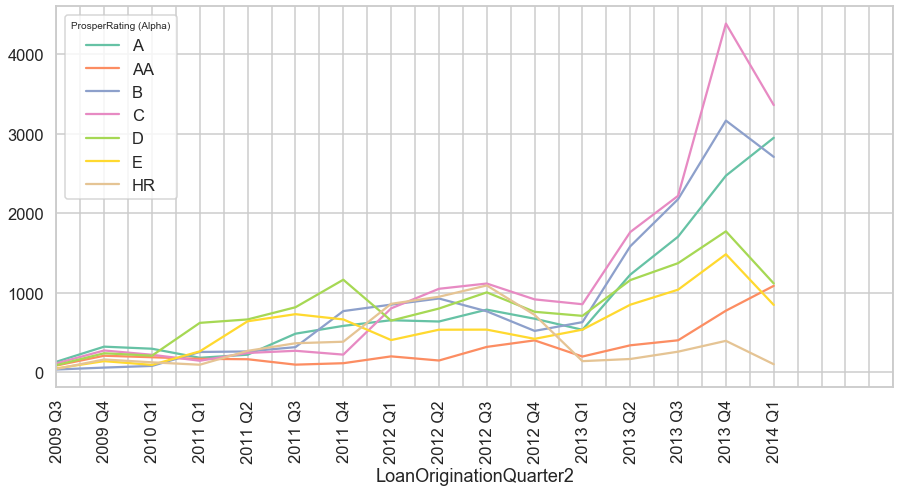

In [94]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(["LoanOriginationQuarter2","ProsperRating (Alpha)"])['LoanOriginationQuarter2'].count().unstack().plot(ax=ax,xticks=np.arange(0,18,0.5))
plt.xticks(rotation = 90)
#df["LoanOriginationQuarter2"].unique()

# MULTIVARIANT loan status is defaulted

In [95]:
# #plot data
# fig, ax = plt.subplots(figsize=(15,7))
# df.groupby(["ProsperRating (Alpha)","LoanOriginationQuarter2"])['ProsperRating (Alpha)'].count().unstack().plot(ax=ax)

In [96]:
df_def=df[(df.LoanStatus == 'Defaulted')]


[]

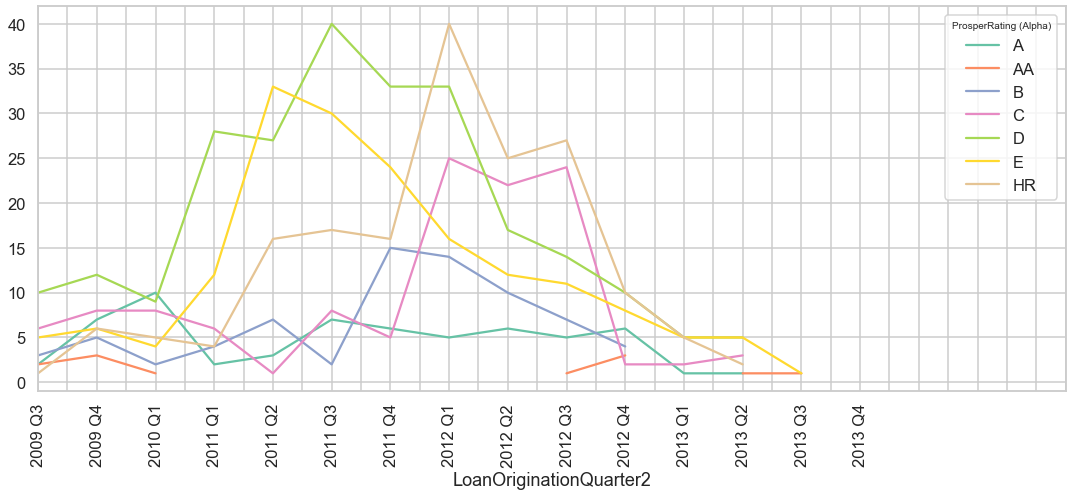

In [97]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_def.groupby(["LoanOriginationQuarter2","ProsperRating (Alpha)"])['LoanOriginationQuarter2'].count().unstack().plot(ax=ax,xticks=np.arange(0,18,0.5))
plt.xticks(rotation = 90)
plt.tight_layout()
ax.plot(kind='bar')

#df["LoanOriginationQuarter2"].unique()

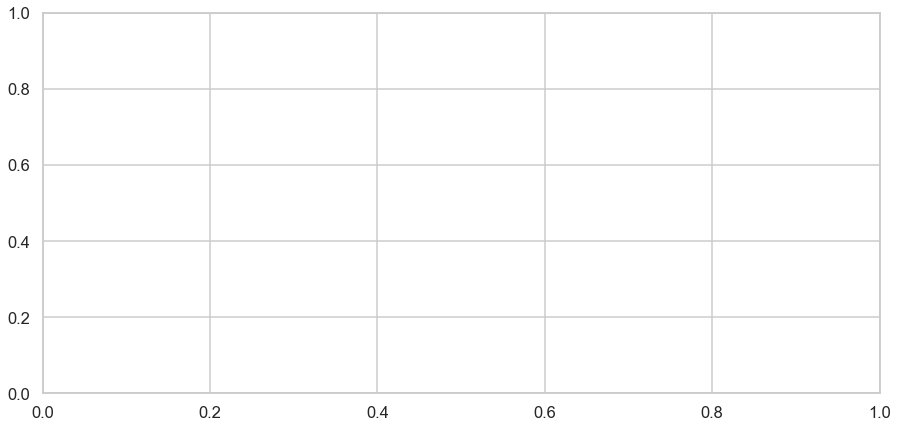

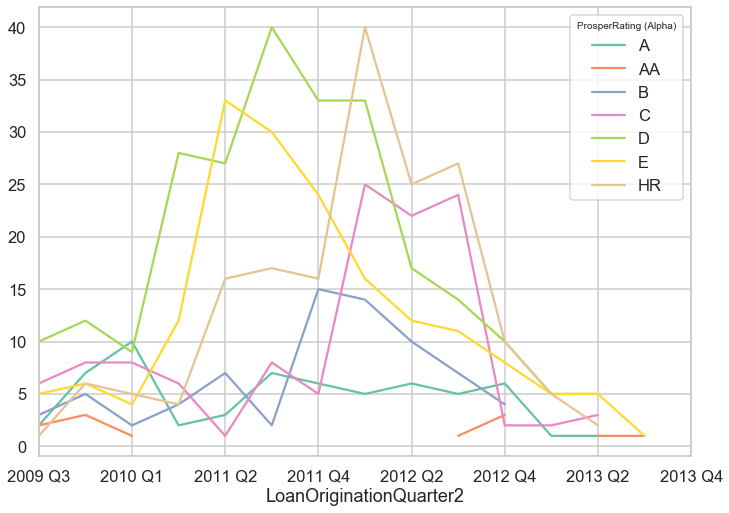

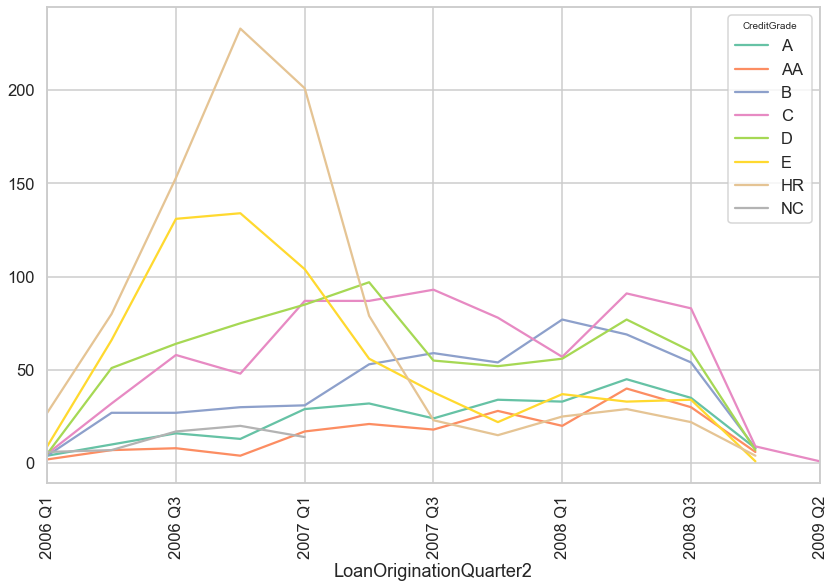

In [98]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_def.groupby(["LoanOriginationQuarter2","ProsperRating (Alpha)"])['LoanOriginationQuarter2'].count().unstack().plot()
df_def.groupby(["LoanOriginationQuarter2","CreditGrade"])['LoanOriginationQuarter2'].count().unstack().plot()


plt.xticks(rotation = 90)
plt.tight_layout()
#ax.plot(kind='bar')

#df["LoanOriginationQuarter2"].unique()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109506 entries, Q1 2006 to Q1 2014
Data columns (total 81 columns):
ListingKey                             109506 non-null object
ListingNumber                          109506 non-null int64
ListingCreationDate                    109506 non-null object
CreditGrade                            28931 non-null object
Term                                   109506 non-null int64
LoanStatus                             109506 non-null object
ClosedDate                             50685 non-null object
BorrowerAPR                            109503 non-null float64
BorrowerRate                           109506 non-null float64
LenderYield                            109506 non-null float64
EstimatedEffectiveYield                80500 non-null float64
EstimatedLoss                          80500 non-null float64
EstimatedReturn                        80500 non-null float64
ProsperRating (numeric)                80500 non-null float64
ProsperRating (Alpha

# 28/09/2019

## when i was ploting the graph on the basis of ProsperRating (Alpha) i realize that it only present for the year 2009 to 2014 and the i see the variable definations for  Creadit grade also which shows the marking from start to year 2009. So i merge both the columns and then plot them then i got the results shown below

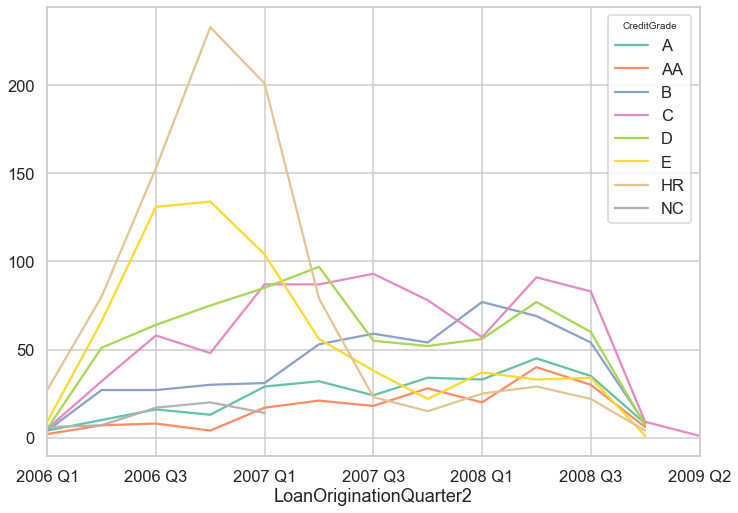

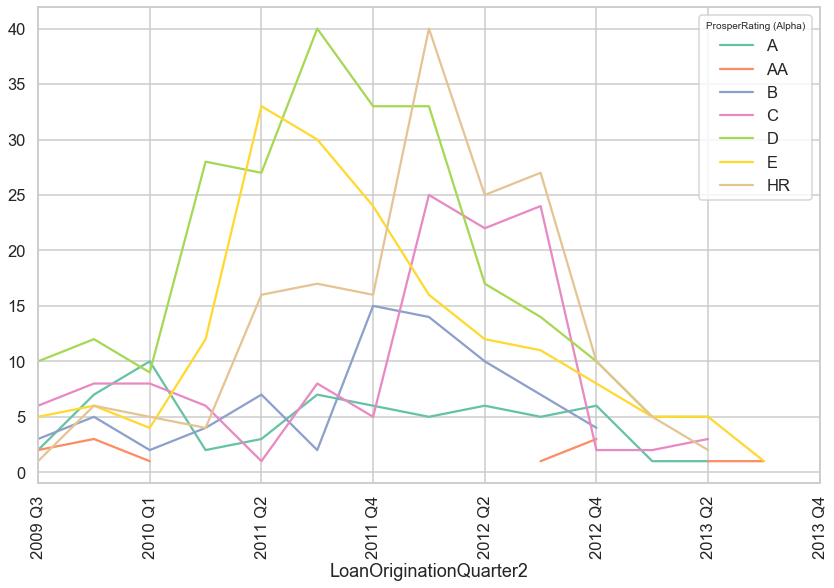

In [100]:
#plot data
# fig, ax = plt.subplots(figsize=(15,7))
df_def.groupby(["LoanOriginationQuarter2","CreditGrade"])['LoanOriginationQuarter2'].count().unstack().plot()

df_def.groupby(["LoanOriginationQuarter2","ProsperRating (Alpha)"])['LoanOriginationQuarter2'].count().unstack().plot()


plt.xticks(rotation = 90)
plt.tight_layout()
#ax.plot(kind='bar')

#df["LoanOriginationQuarter2"].unique()

In [101]:
df_combine=df_def
df_combine.CreditGrade.fillna(df_combine["ProsperRating (Alpha)"], inplace=True)

Text(0, 0.5, 'Defaulters')

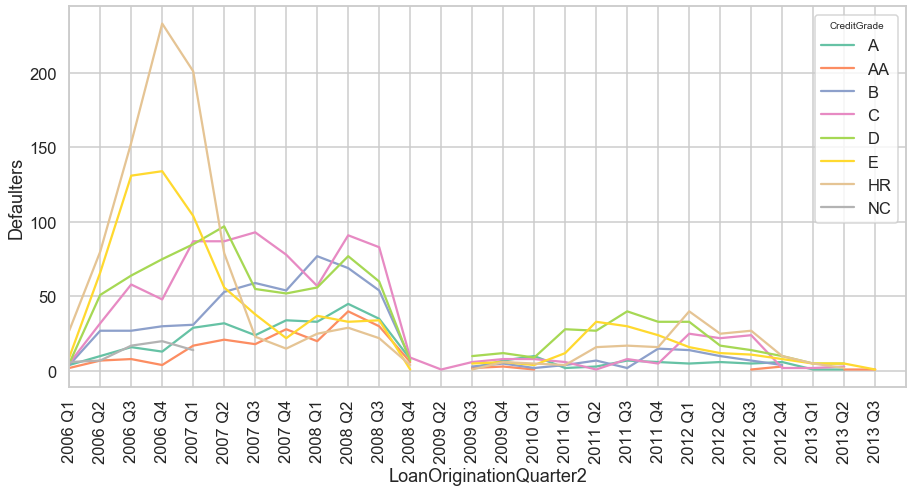

In [102]:
fig, ax = plt.subplots(figsize=(15,7))
df_def.groupby(["LoanOriginationQuarter2","CreditGrade"])['LoanOriginationQuarter2'].count().unstack().plot(ax=ax,xticks=np.arange(0,27,1))
plt.xticks(rotation = 90)
plt.ylabel("Defaulters")

Text(0, 0.5, 'Defaulters')

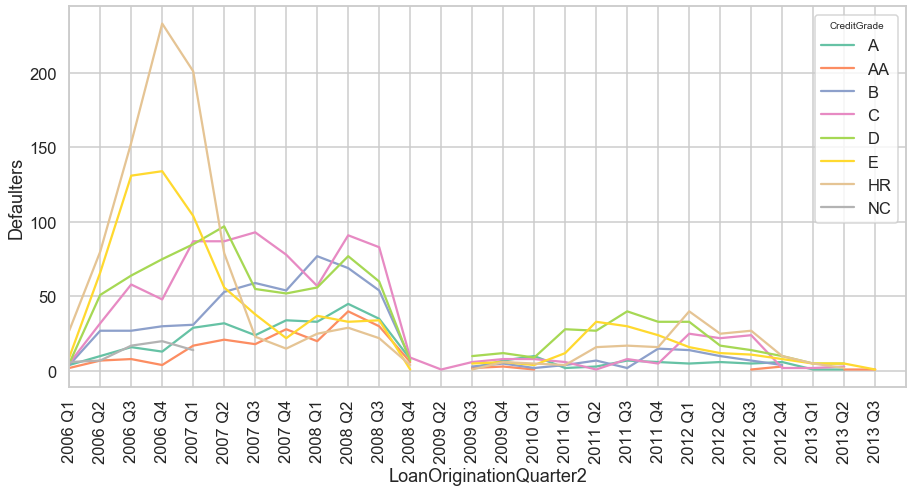

In [106]:
fig, ax = plt.subplots(figsize=(15,7))
df_def_groupby=df_def.groupby(["LoanOriginationQuarter2","CreditGrade"])
df_def_groupby['LoanOriginationQuarter2'].count().unstack().plot(ax=ax,xticks=np.arange(0,27,1))
# ax = sns.barplot(x="LoanOriginationQuarter2", y="LoanOriginationQuarter2", data=df_def_groupby, estimator=lambda x: len(x) / len(df_def_groupby) * 100)
ax.set(ylabel="Percent")

plt.xticks(rotation = 90)
plt.ylabel("Defaulters")

# 1/10/2019

# I was un able to create line plot so i have created this one so i created there charts

In [109]:
import matplotlib.ticker as ticker
import dexplot as dxp


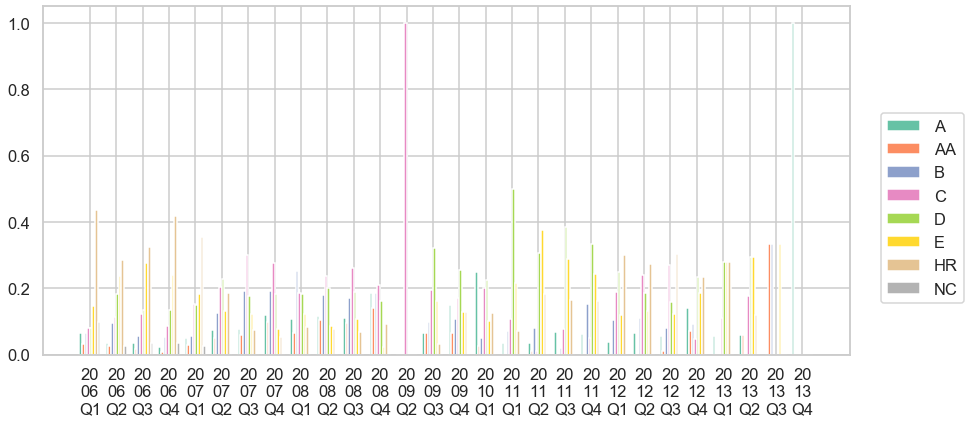

In [112]:
dxp.aggplot('LoanOriginationQuarter2', data=df_def, hue='CreditGrade', normalize='LoanOriginationQuarter2')


In [155]:
# fig, ax = plt.subplots(figsize=(8,6))
# bp = df_def.groupby('LoanOriginationQuarter2').plot(kind='kde', ax=ax)

In [120]:
df_def_1=df_def[["LoanOriginationQuarter2","CreditGrade"]]
df_def_1["CreditGrade"].unique()

array(['D', 'A', 'B', 'NC', 'HR', 'E', 'C', 'AA', nan], dtype=object)

In [125]:
# fig, ax = plt.subplots(figsize=(10,8))
# CreditGrades = df_def_1["CreditGrade"].unique()
# for c in CreditGrades:
#     df_def2 = df_def_1.loc[df_def_1['CreditGrade'] == c]
#     df_def2.LoanOriginationQuarter2.plot(kind="kde", ax=ax, label=c)
# plt.legend()

In [128]:
# # df = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
# #                    'office_id': list(range(1, 7)) * 2,
# #                    'sales': [np.random.randint(100000, 999999)
# #                              for _ in range(12)]})
# state_office = df_def.groupby(['LoanOriginationQuarter2', 'CreditGrade']).agg({'LoanStatus': 'sum'})
# # Change: groupby state_office and divide by sum
# state_pcts = state_office.groupby(level=0).apply(lambda x:
#                                                  100 * x / float(x.sum()))

In [129]:
df_Loan_status_Group_5=df_Loan_status_Group[(df_Loan.LoanStatus == 'Completed')|(df_Loan.LoanStatus == 'Defaulted')]


In [134]:
df_Loan_status_Group_5["LoanOriginationQuarter"].unique()


array(['Q3 2007', 'Q1 2007', 'Q4 2007', 'Q2 2012', 'Q2 2013', 'Q1 2013',
       'Q2 2010', 'Q1 2012', 'Q4 2010', 'Q3 2006', 'Q3 2008', 'Q4 2006',
       'Q2 2007', 'Q2 2011', 'Q1 2011', 'Q4 2011', 'Q3 2009', 'Q2 2008',
       'Q1 2010', 'Q1 2008', 'Q3 2013', 'Q4 2009', 'Q2 2006', 'Q3 2010',
       'Q1 2006', 'Q4 2013', 'Q3 2012', 'Q3 2011', 'Q4 2008', 'Q4 2012',
       'Q1 2014', 'Q4 2005', 'Q2 2009'], dtype=object)

In [91]:
# df = df_Loan
# df['LoanOriginationQuarter2']=df['LoanOriginationQuarter']
# #df = df_Loan.set_index('LoanOriginationQuarter')
# "df.loc[order_LoanOriginationQuarter]

In [139]:
df_Loan_status_Group_5.replace(to_replace={"LoanOriginationQuarter2": {'Q4 2005':'2005 Q4','Q1 2006':'2006 Q1', 'Q2 2006': '2006 Q2', 'Q3 2006':'2006 Q3', 'Q4 2006':'2006 Q4','Q1 2007':'2007 Q1','Q2 2007':'2007 Q2','Q3 2007':'2007 Q3','Q4 2007':'2007 Q4','Q1 2008':'2008 Q1','Q2 2008':'2008 Q2','Q3 2008':'2008 Q3','Q4 2008':'2008 Q4','Q2 2009':'2009 Q2','Q3 2009':'2009 Q3','Q4 2009':'2009 Q4','Q1 2010':'2010 Q1','Q2 2010':'2010 Q2','Q3 2010':'2010 Q3','Q4 2010':'2010 Q4','Q1 2011':'2011 Q1','Q2 2011':'2011 Q2','Q3 2011':'2011 Q3','Q4 2011':'2011 Q4', 'Q1 2012': '2012 Q1', 'Q2 2012': '2012 Q2','Q3 2012':'2012 Q3', 'Q4 2012': '2012 Q4','Q1 2013':'2013 Q1', 'Q2 2013': '2013 Q2','Q3 2013':'2013 Q3','Q4 2013':'2013 Q4','Q1 2014':'2014 Q1'}}, inplace=True)


In [140]:
df_Loan_status_Group_5["LoanOriginationQuarter2"].unique()


array(['2007 Q3', '2007 Q1', '2007 Q4', '2012 Q2', '2013 Q2', '2013 Q1',
       '2010 Q2', '2012 Q1', '2010 Q4', '2006 Q3', '2008 Q3', '2006 Q4',
       '2007 Q2', '2011 Q2', '2011 Q1', '2011 Q4', '2009 Q3', '2008 Q2',
       '2010 Q1', '2008 Q1', '2013 Q3', '2009 Q4', '2006 Q2', '2010 Q3',
       '2006 Q1', '2013 Q4', '2012 Q3', '2011 Q3', '2008 Q4', '2012 Q4',
       '2014 Q1', '2005 Q4', '2009 Q2'], dtype=object)

Text(0, 0.5, 'Defaulters')

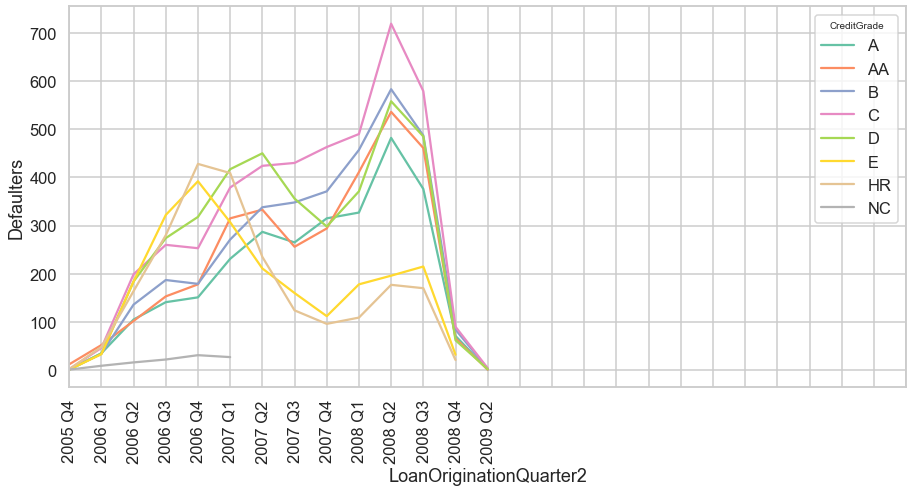

In [141]:
fig, ax = plt.subplots(figsize=(15,7))
df_Loan_status_Group_5.groupby(["LoanOriginationQuarter2","CreditGrade"])['LoanOriginationQuarter2'].count().unstack().plot(ax=ax,xticks=np.arange(0,27,1))
plt.xticks(rotation = 90)
plt.ylabel("Defaulters")

In [147]:
# g = sns.FacetGrid(df_Loan_status_Group_5, col="Cluster_3_0")
# g.map(sns.countplot,x=df['LoanOriginationQuarter2'],
# #y=df['zone_number'],
# #estimator=(lambda x: len(x) / len(df) * 100),
# order=([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]))

In [146]:
# percentage = lambda i: len(i) / float(len(df['LoanOriginationQuarter2'])) * 100

# ax = sns.barplot(x=df['LoanOriginationQuarter2'], y=df['LoanOriginationQuarter2'],  estimator=percentage)
# ax.set(ylabel="Percent")
# plt.show()

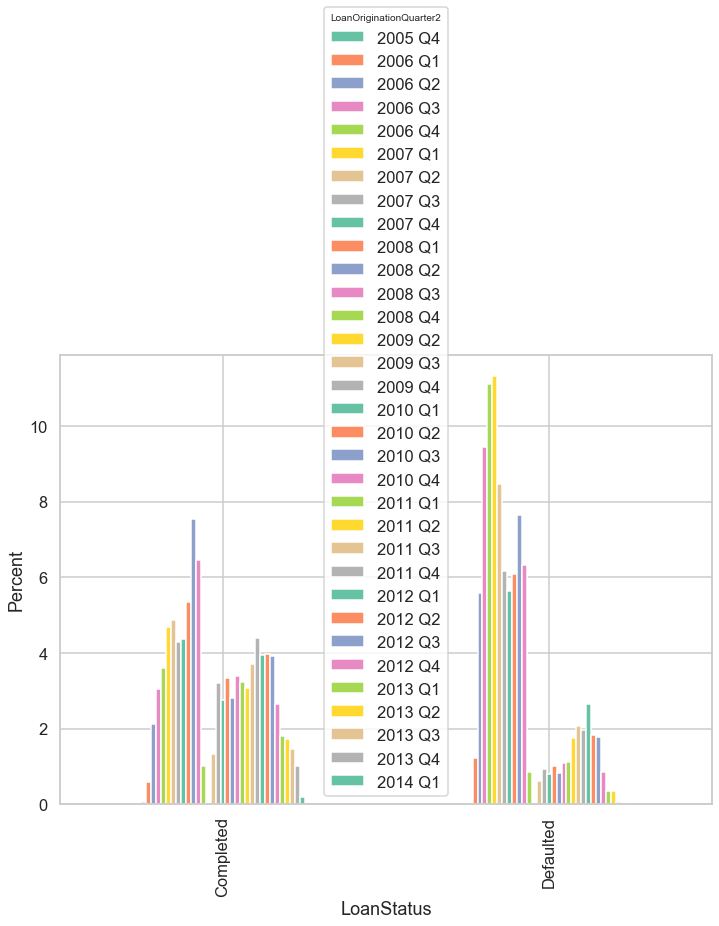

In [154]:
ax = (df_Loan_status_Group_5.groupby(["LoanStatus"])['LoanOriginationQuarter2'].value_counts(normalize=True, sort=False)*100).unstack().plot.bar()
ax.set(ylabel="Percent")
plt.show()